In [2]:
import pandas as pd

df = pd.read_csv("../data/dataset-of-00s.csv")
print(df.columns)


Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


Data Shape: (41106, 14)

Data Types:
 acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
valence             float64
tempo               float64
loudness            float64
popularity            int64
decade               object
dance_energy        float64
valence_acoustic    float64
loudness_norm       float64
dtype: object

Summary Statistics:
        acousticness  danceability        energy  instrumentalness  \
count  41106.000000  41106.000000  41106.000000      41106.000000   
mean       0.364197      0.539695      0.579545          0.154416   
std        0.338913      0.177821      0.252628          0.303530   
min        0.000000      0.000000      0.000251          0.000000   
25%        0.039400      0.420000      0.396000          0.000000   
50%        0.258000      0.552000      0.601000          0.000120   
75%        0.676000      0.669000      0.787000    

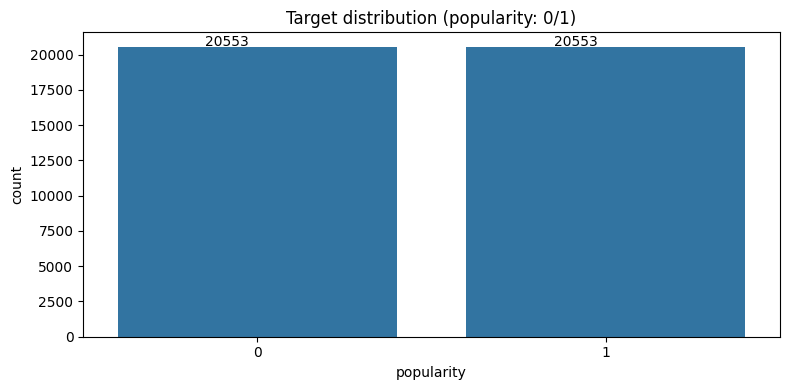

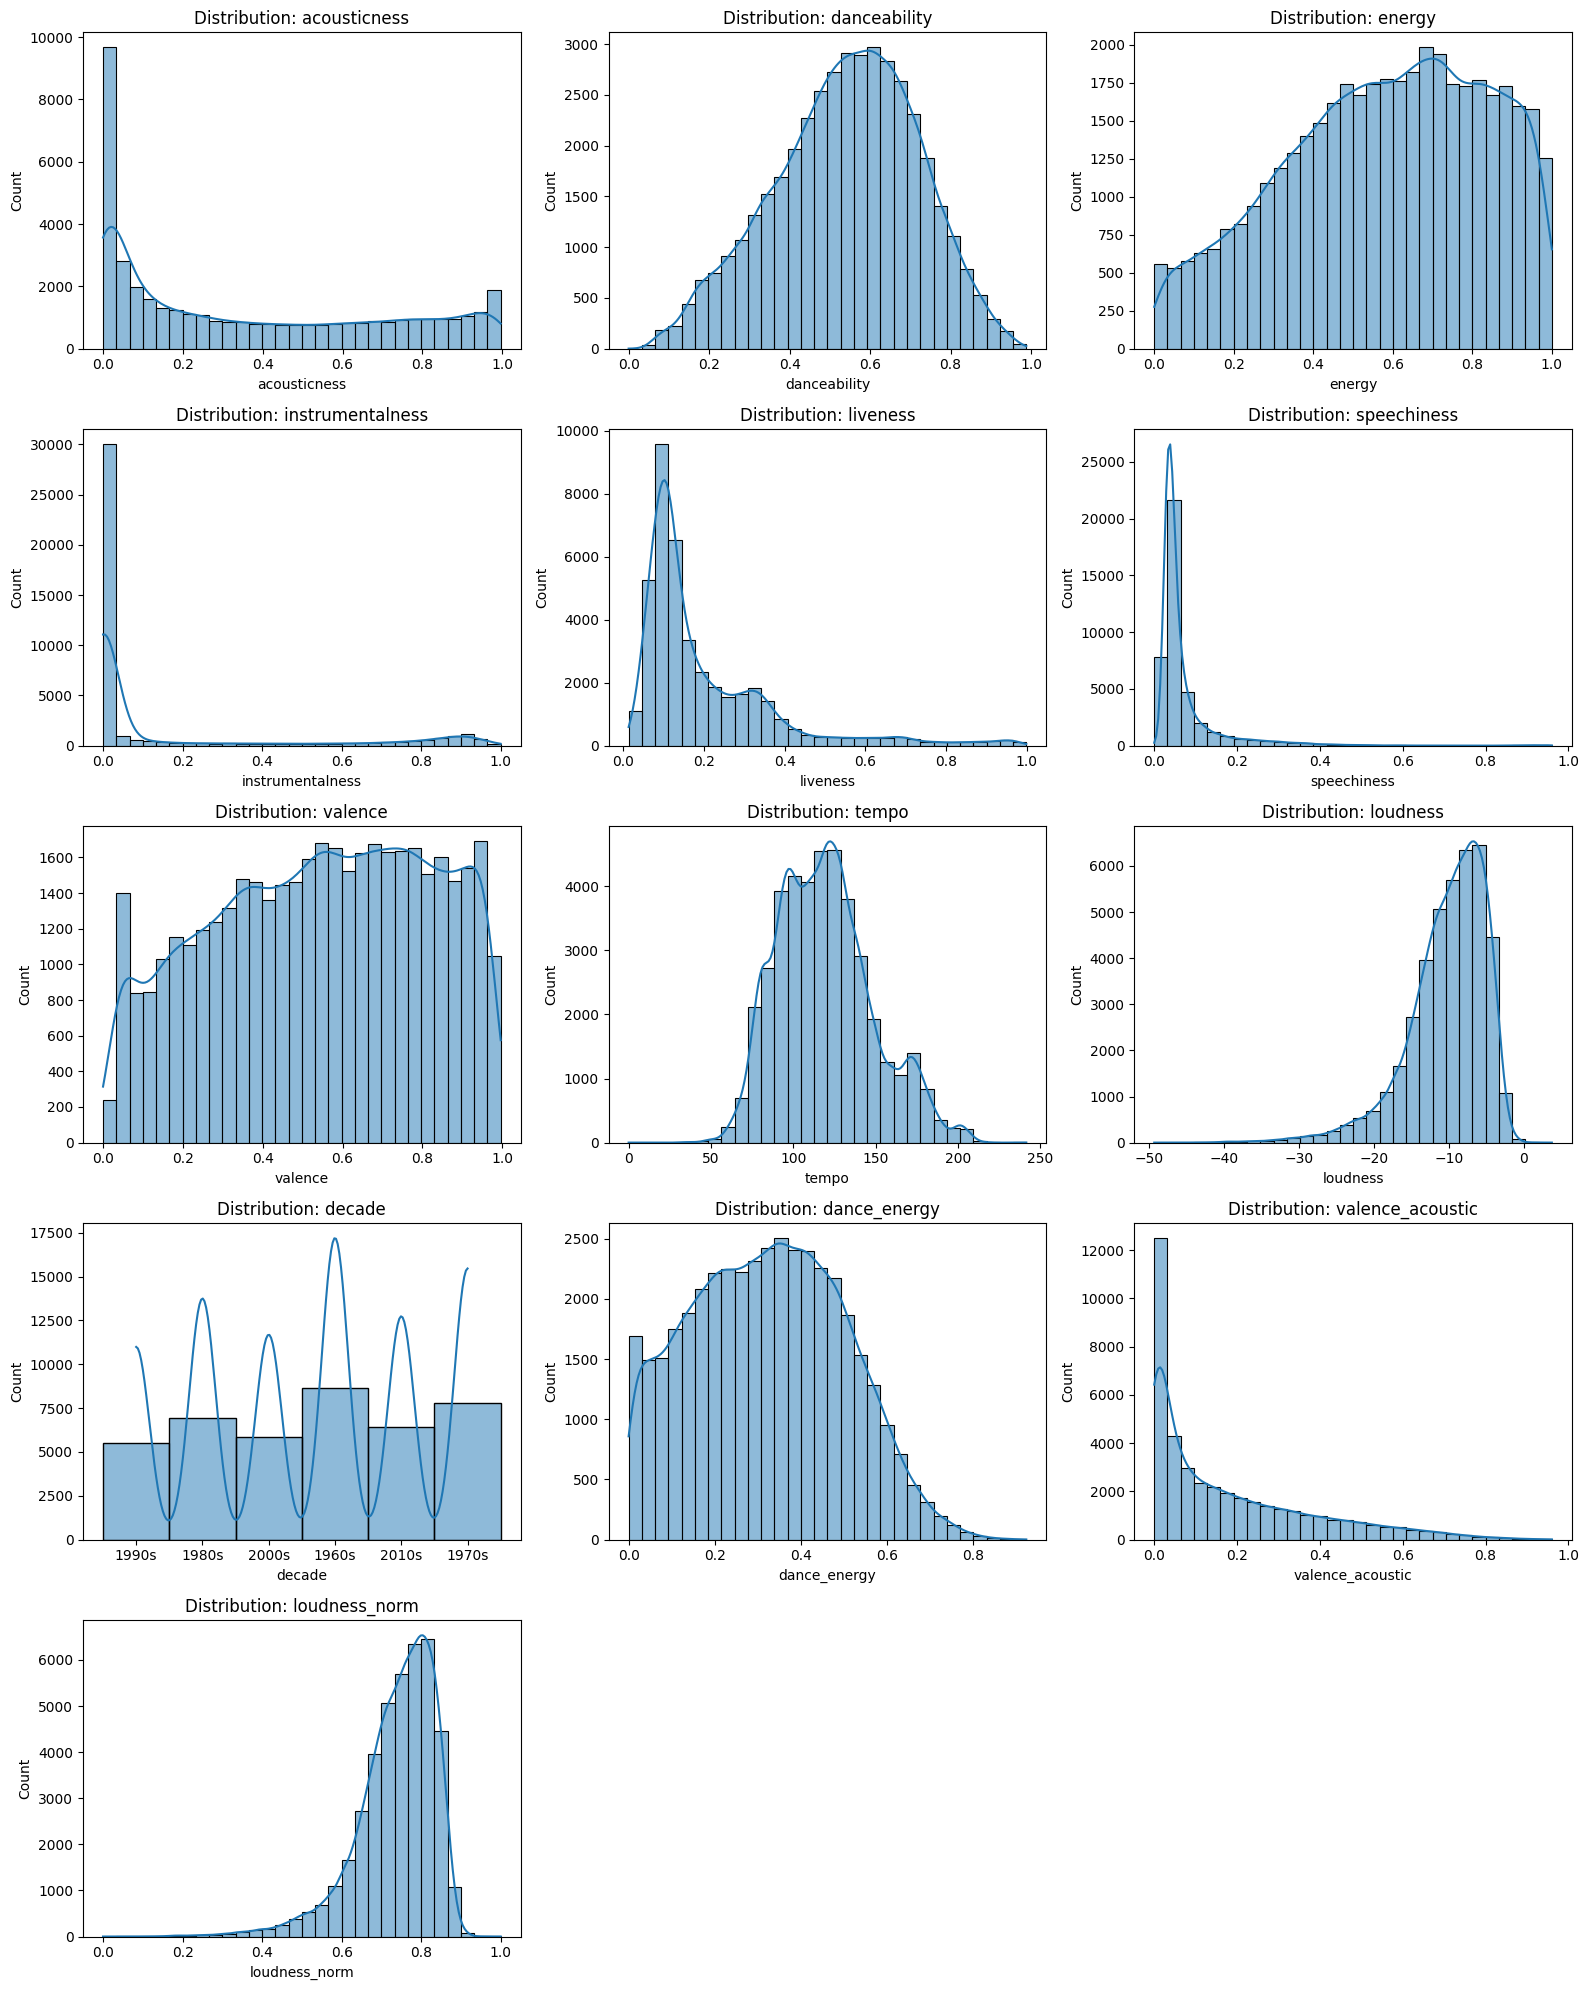

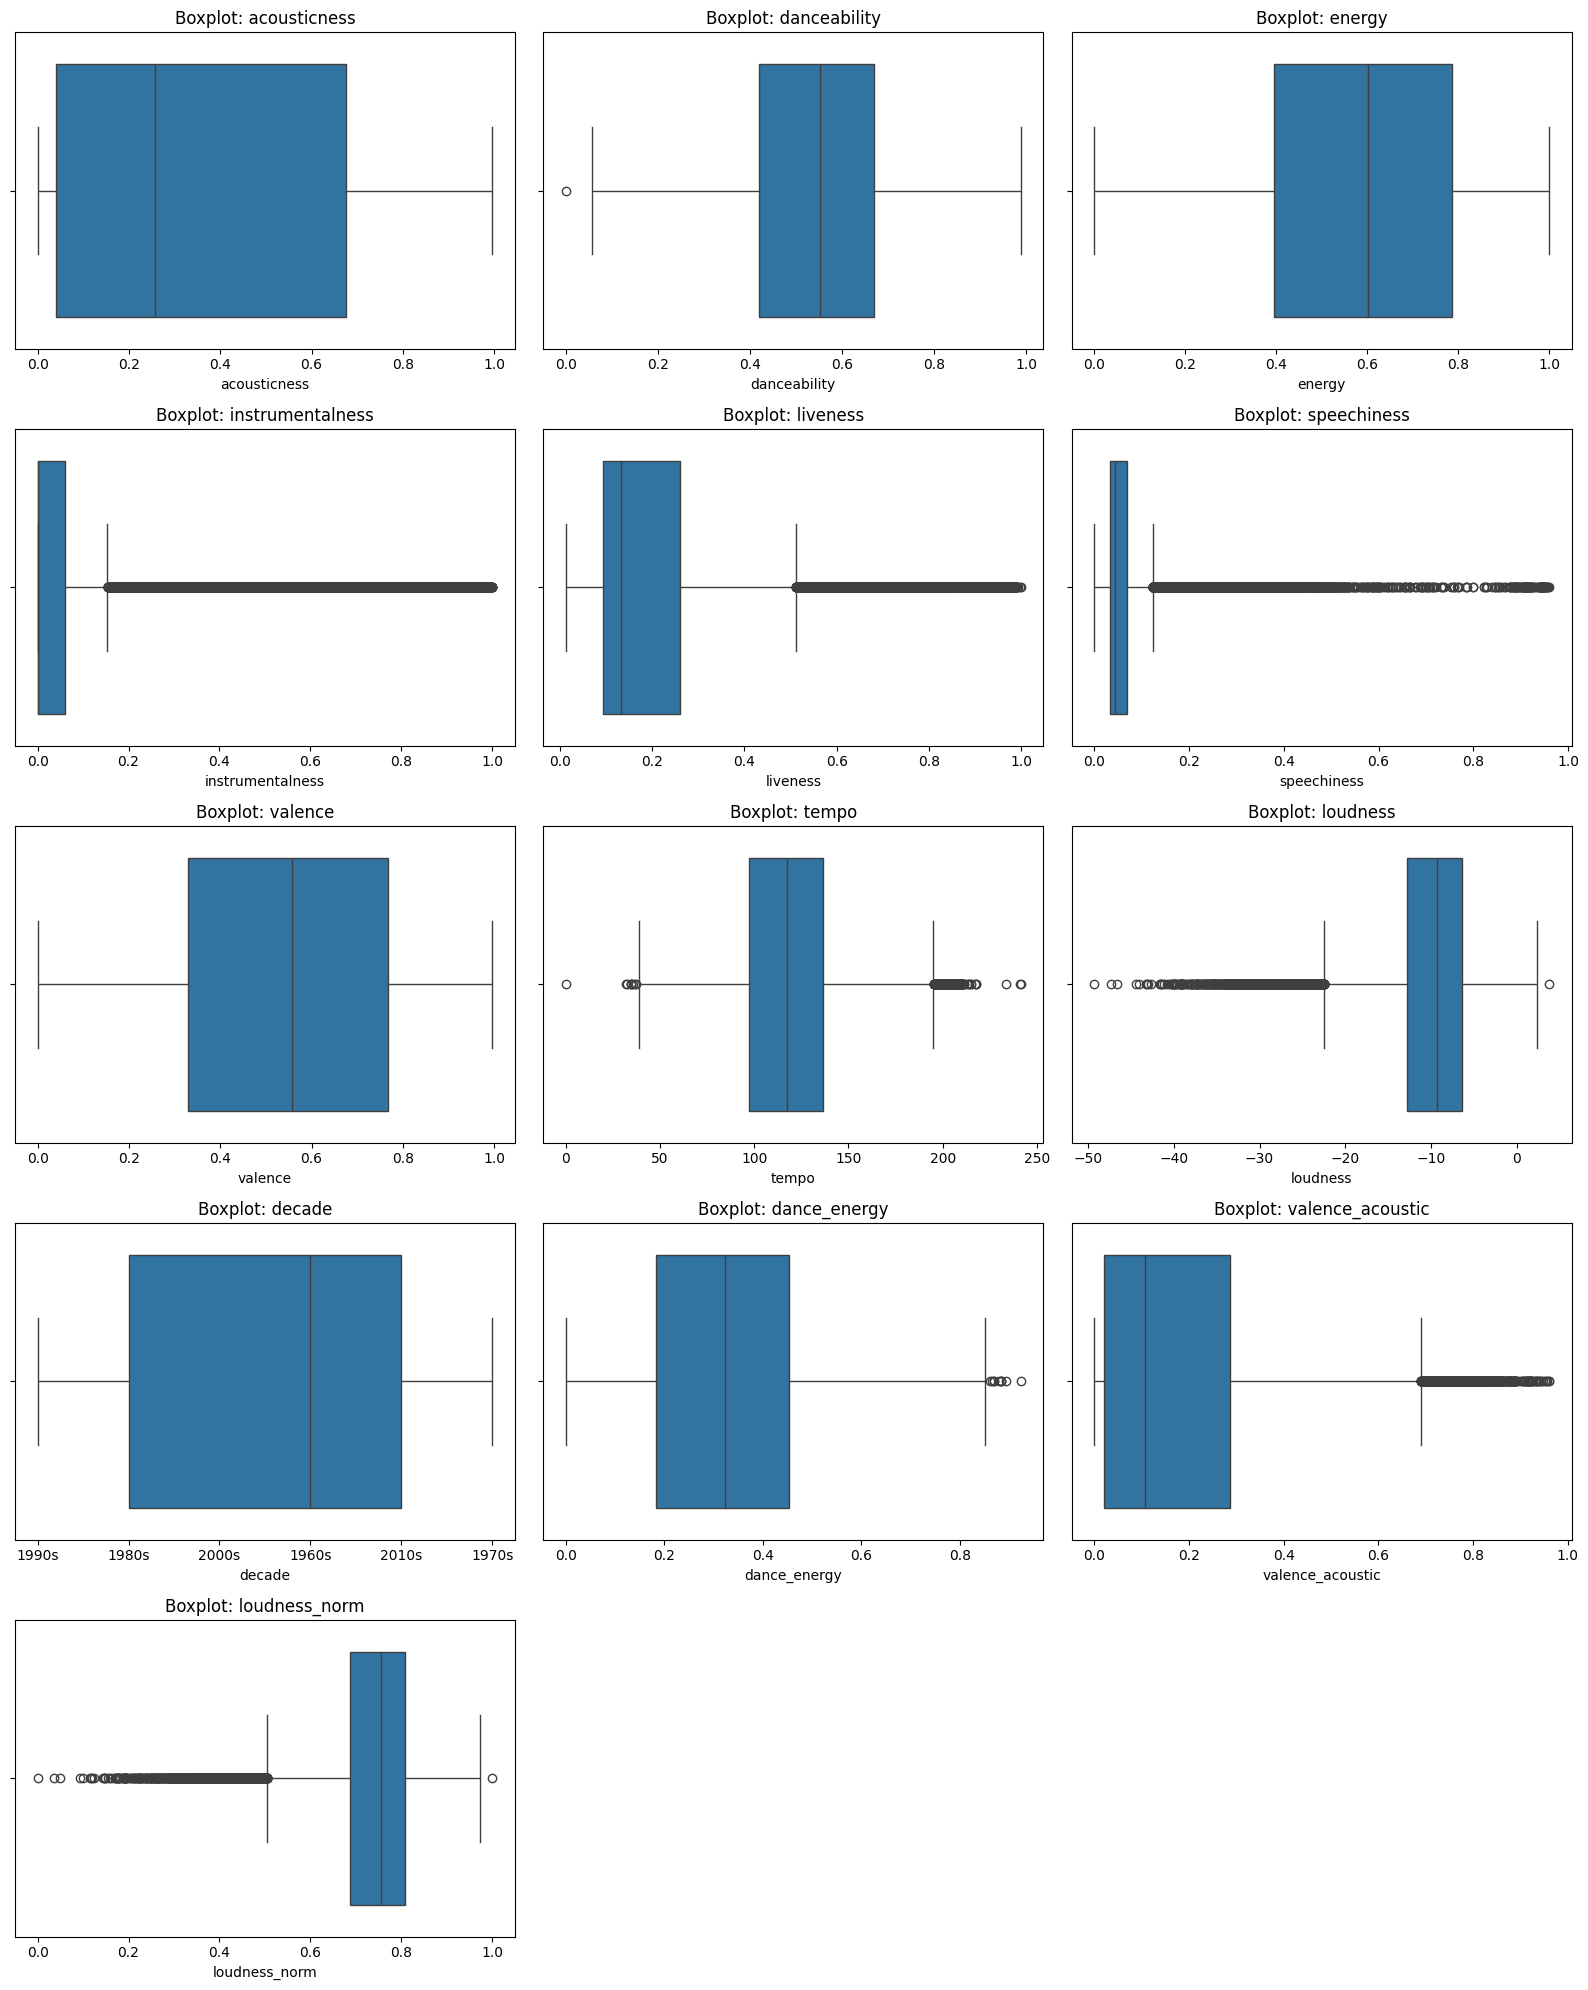

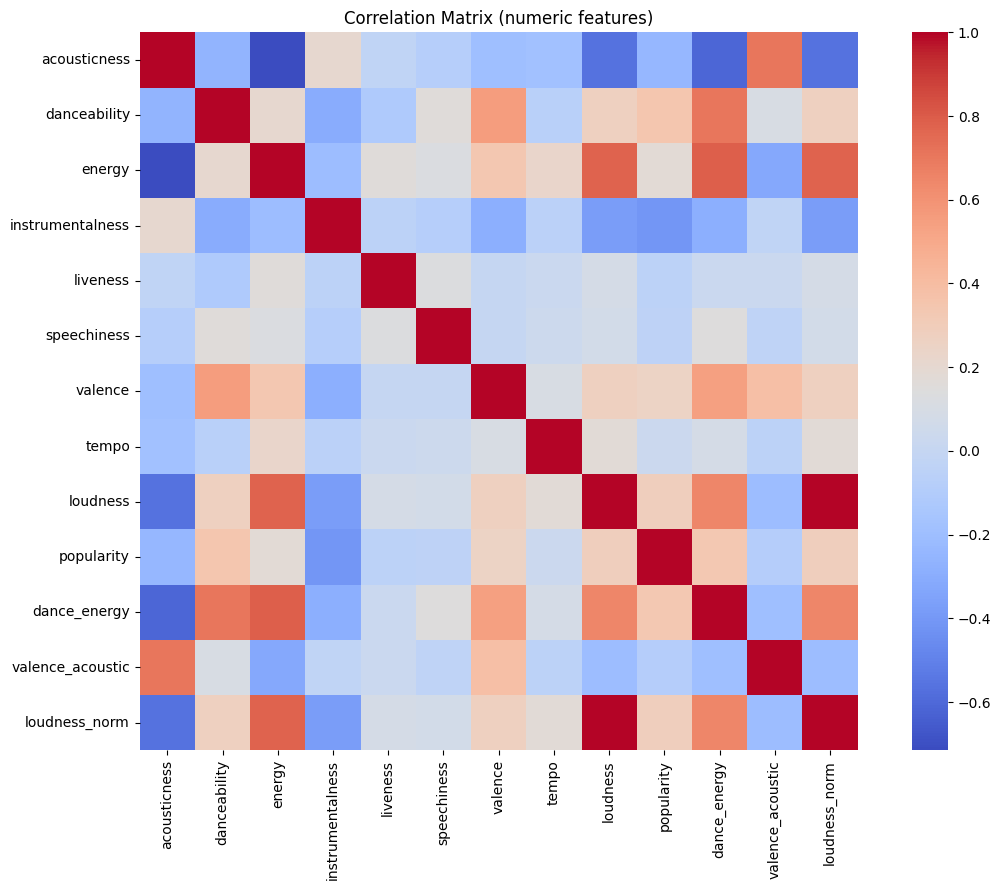


Top correlations with target:
 danceability        0.346097
dance_energy        0.336460
loudness            0.286034
loudness_norm       0.286034
valence             0.251147
energy              0.177142
tempo               0.032649
speechiness        -0.040835
liveness           -0.051445
valence_acoustic   -0.088423
Name: popularity, dtype: float64

Bottom correlations with target:
 loudness            0.286034
loudness_norm       0.286034
valence             0.251147
energy              0.177142
tempo               0.032649
speechiness        -0.040835
liveness           -0.051445
valence_acoustic   -0.088423
acousticness       -0.246036
instrumentalness   -0.407638
Name: popularity, dtype: float64


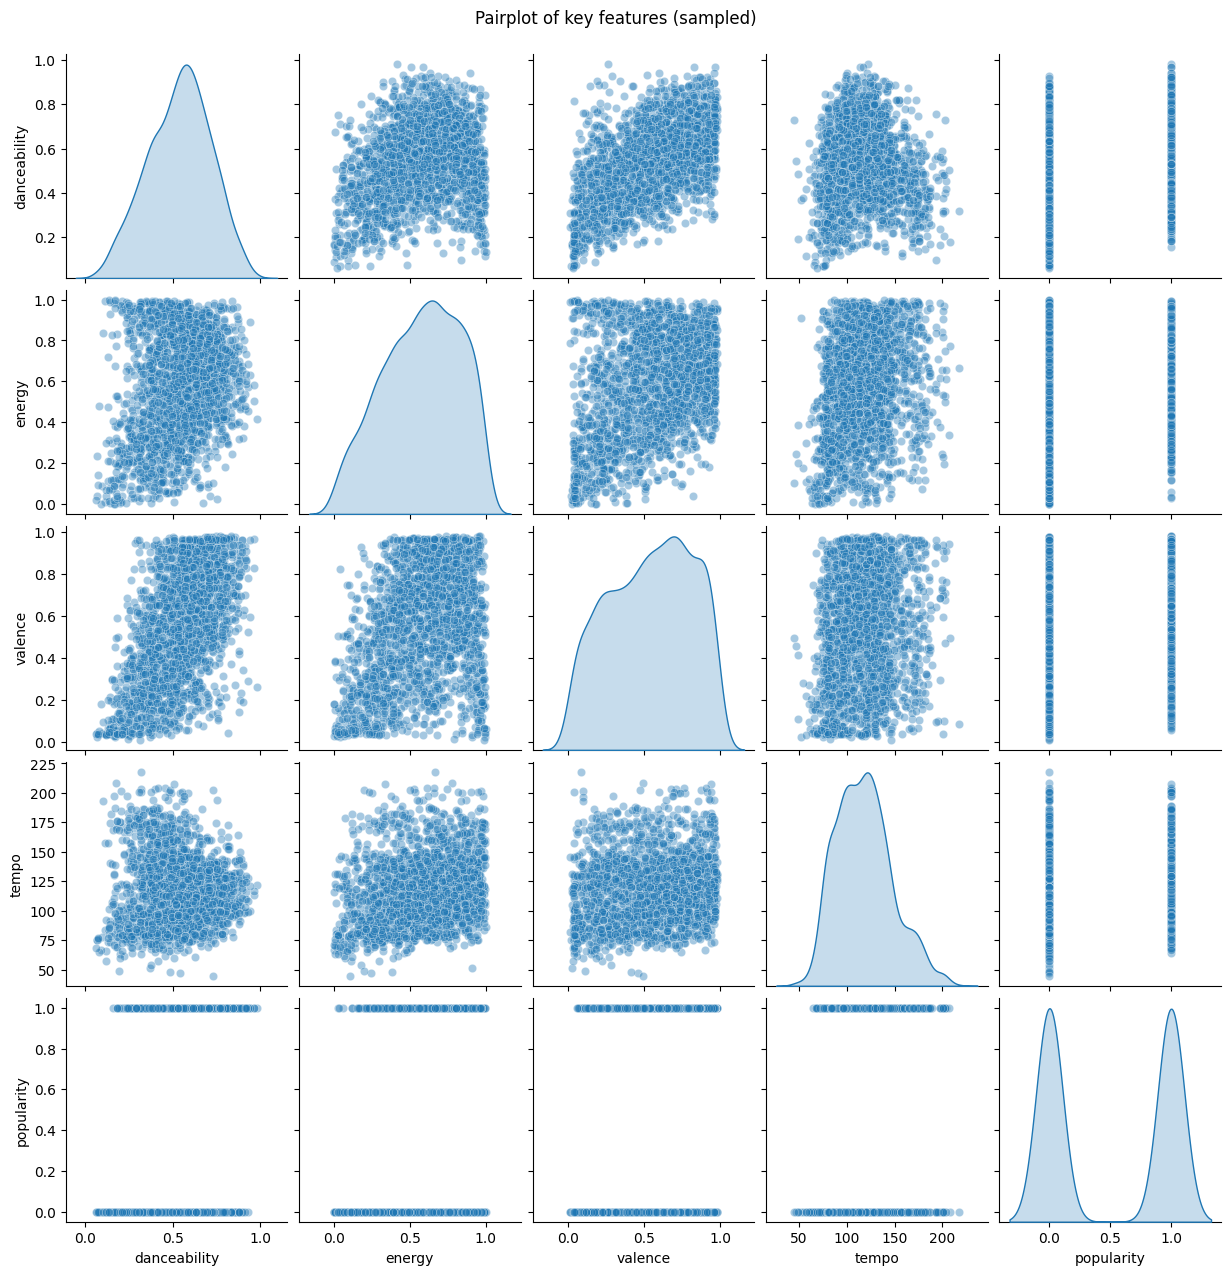


No missing values detected.


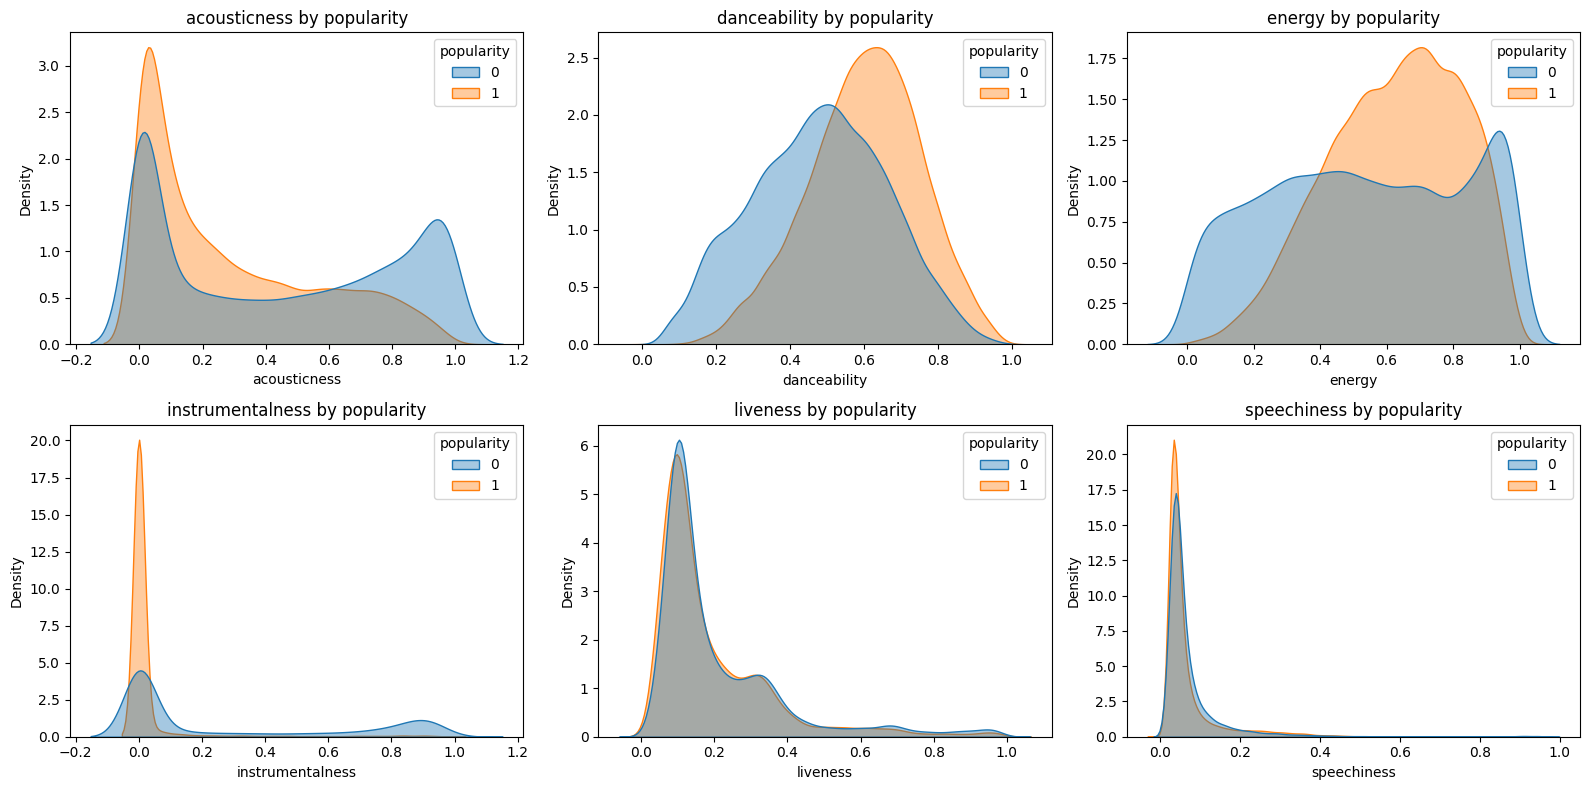

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Load data ===
df = pd.read_csv("../data/processed/cleaned_music_data_with_decade.csv")

print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# --- helpers ---
def make_grid(n_items, cols=3):
    rows = (n_items + cols - 1) // cols
    return rows, cols

# === 1) Target overview ===
target = "popularity"

plt.figure(figsize=(8, 4))
if df[target].nunique() <= 10 and set(df[target].unique()).issubset({0,1}):
    sns.countplot(x=target, data=df)
    plt.title("Target distribution (popularity: 0/1)")
    for p in plt.gca().patches:
        plt.gca().annotate(f"{int(p.get_height())}", (p.get_x()+0.25, p.get_height()+50))
else:
    sns.histplot(df[target], bins=30, kde=True, color="orange")
    plt.title("Distribution of popularity (continuous)")
plt.tight_layout()
plt.show()

# === 2) Feature distributions (dynamic grid) ===
features = [c for c in df.columns if c != target]
rows, cols = make_grid(len(features), cols=3)

plt.figure(figsize=(16, 4*rows))
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

# === 3) Boxplots for outliers (dynamic grid) ===
plt.figure(figsize=(16, 4*rows))
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

# === 4) Correlation heatmap ===
# choose only numeric columns to avoid errors
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 9))
corr = num_df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix (numeric features)")
plt.tight_layout()
plt.show()

# Optional: show top correlations with target
if target in corr.columns:
    target_corr = corr[target].drop(target).sort_values(ascending=False)
    print("\nTop correlations with target:\n", target_corr.head(10))
    print("\nBottom correlations with target:\n", target_corr.tail(10))

# === 5) Pairplot on a small subset of features to keep it readable ===
key_features = [f for f in ["danceability", "energy", "valence", "tempo", target] if f in df.columns]
if len(key_features) >= 3:
    sns.pairplot(df[key_features].sample(min(2000, len(df))), diag_kind="kde", plot_kws={"alpha":0.4})
    plt.suptitle("Pairplot of key features (sampled)", y=1.02)
    plt.show()

# === 6) Missing values check ===
missing = df.isna().sum()
if missing.any():
    print("\nMissing values:\n", missing[missing>0].sort_values(ascending=False))
else:
    print("\nNo missing values detected.")

# === 7) Quick feature-target relationship plots ===
# For continuous features vs binary target, show KDEs by class
if set(df[target].unique()).issubset({0,1}):
    cont_feats = [c for c in features if df[c].dtype != 'O']
    sample_feats = cont_feats[:6]  # limit to 6
    r, c = make_grid(len(sample_feats), cols=3)
    plt.figure(figsize=(16, 4*r))
    for i, col in enumerate(sample_feats, 1):
        plt.subplot(r, c, i)
        sns.kdeplot(data=df, x=col, hue=target, common_norm=False, fill=True, alpha=0.4)
        plt.title(f"{col} by {target}")
    plt.tight_layout()
    plt.show()

In [2]:
import pandas as pd
import glob

# Match all dataset files
all_files = glob.glob("../data/dataset-of-00s.csv")

for file in all_files:
    df = pd.read_csv(file)
    print(f"\nFile: {file}")
    print("Columns:", df.columns.tolist())



File: ../data/dataset-of-00s.csv
Columns: ['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target']


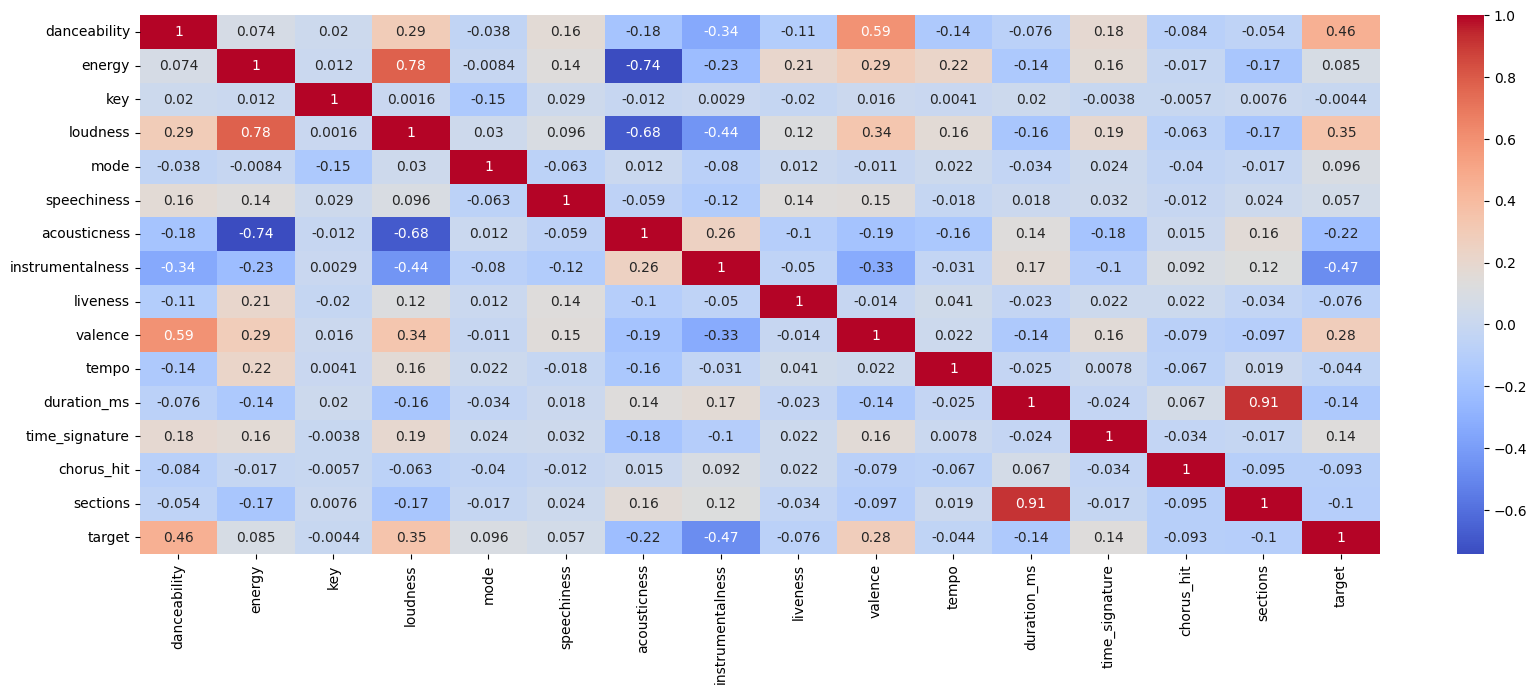

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Option 1: ask corr() to use only numeric columns (requires pandas ≥1.5)
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

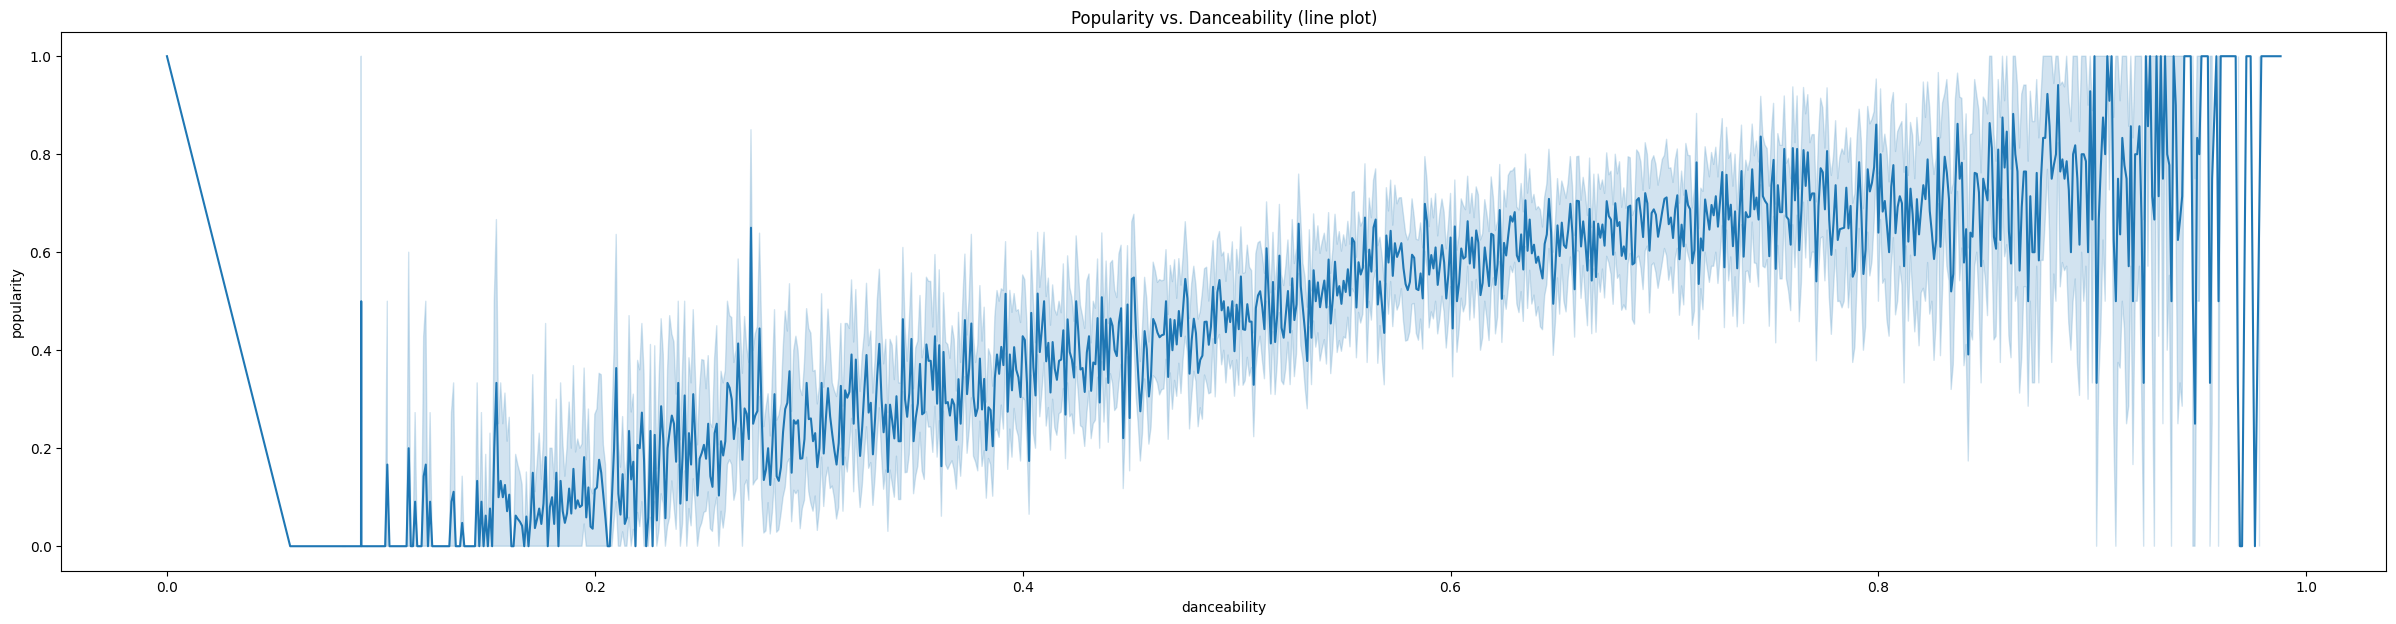

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Line plot: sort by a numeric variable to show a trend.
# For example, popularity vs. tempo.
df_sorted = df.sort_values('danceability')  # ensure the x-axis is ordered
sns.lineplot(data=df_sorted, x='danceability', y='popularity')
plt.title('Popularity vs. Danceability (line plot)')
plt.show()

In [1]:
import pandas as pd
import glob


# Read and combine into one DataFrame
df = pd.read_csv("../data/processed/cleaned_music_data.csv")
# Shape returns (rows, columns)
rows, cols = df.shape
print(f"Total rows: {rows}")
print(f"Total columns: {cols}")

print(df.head())

Total rows: 40686
Total columns: 13
   acousticness  danceability  energy  instrumentalness  liveness  \
0      0.693000         0.527   0.316           0.00699    0.1680   
1      0.559000         0.738   0.541           0.00000    0.0492   
2      0.693000         0.736   0.419           0.49500    0.0809   
3      0.655000         0.565   0.594           0.92600    0.6750   
4      0.000017         0.513   0.760           0.00339    0.1530   

   speechiness  valence    tempo  loudness  popularity  dance_energy  \
0       0.0310    0.543  116.211   -15.769           0      0.166532   
1       0.0311    0.309  134.187    -5.485           1      0.399258   
2       0.0300    0.265   93.982   -10.662           0      0.308384   
3       0.0646    0.763  114.219   -13.086           0      0.335610   
4       0.0355    0.961  153.166   -10.077           0      0.389880   

   valence_acoustic  loudness_norm  
0          0.376299       0.631809  
1          0.172731       0.825858  
2    

In [3]:
desc = df.describe()

# Compare max to 75% quantile * 1.5
outlier_candidates = desc.loc["max"] > (desc.loc["75%"] * 1.5)

# Show only columns where this is True
outlier_candidates[outlier_candidates]

instrumentalness    True
liveness            True
speechiness         True
tempo               True
loudness            True
dance_energy        True
valence_acoustic    True
dtype: bool

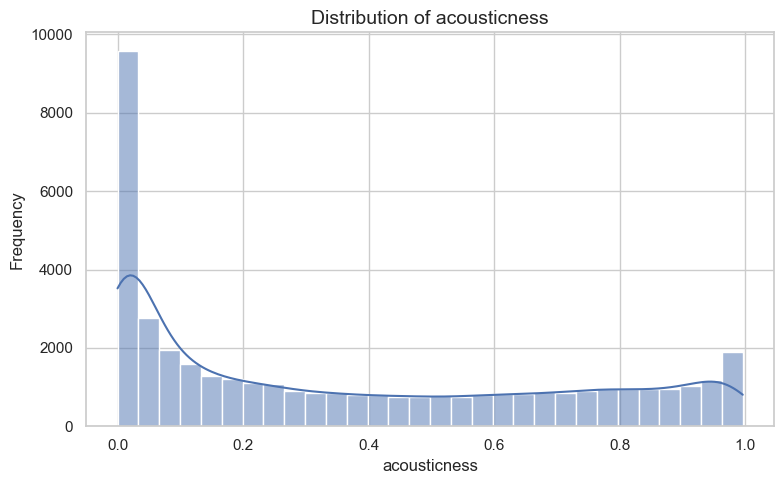

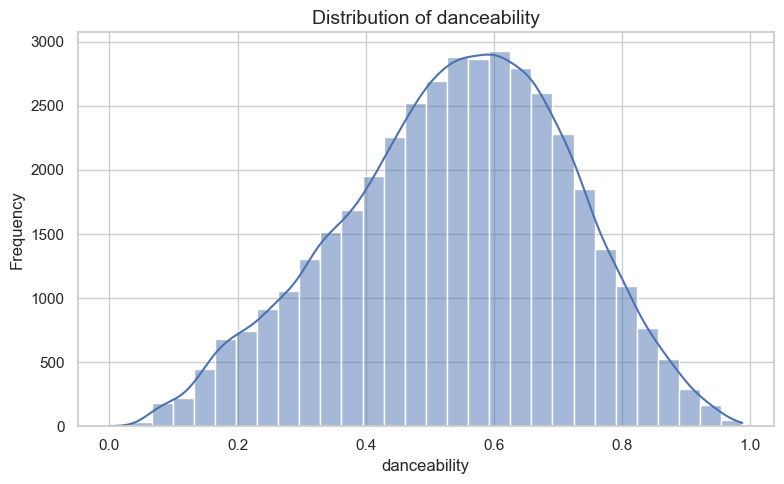

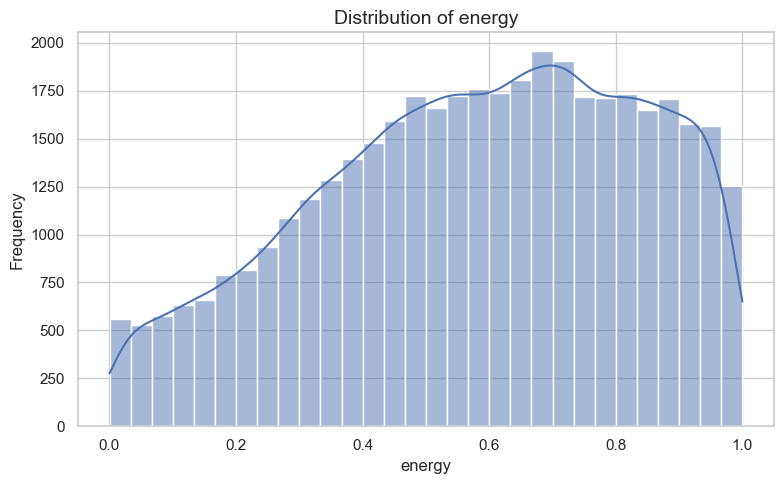

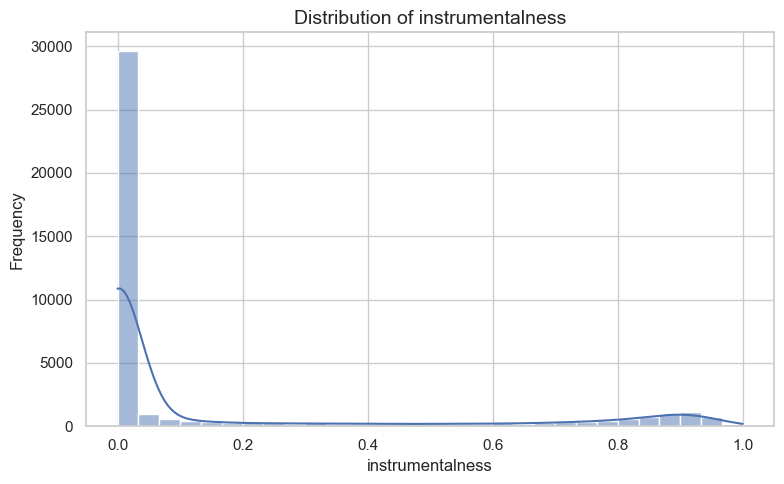

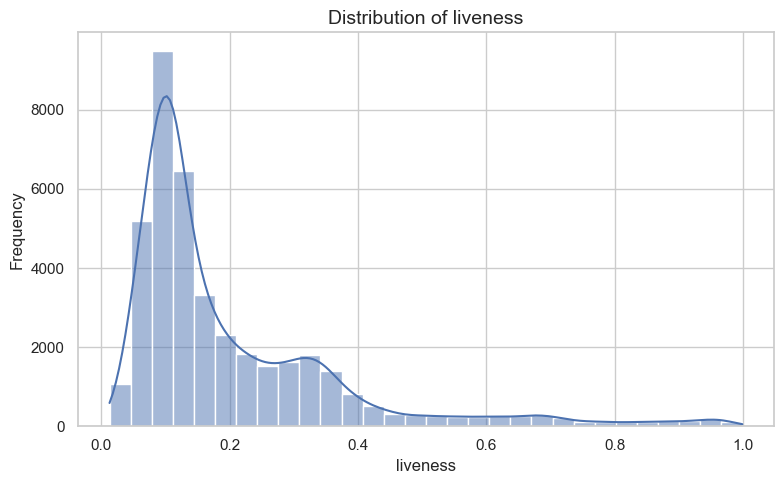

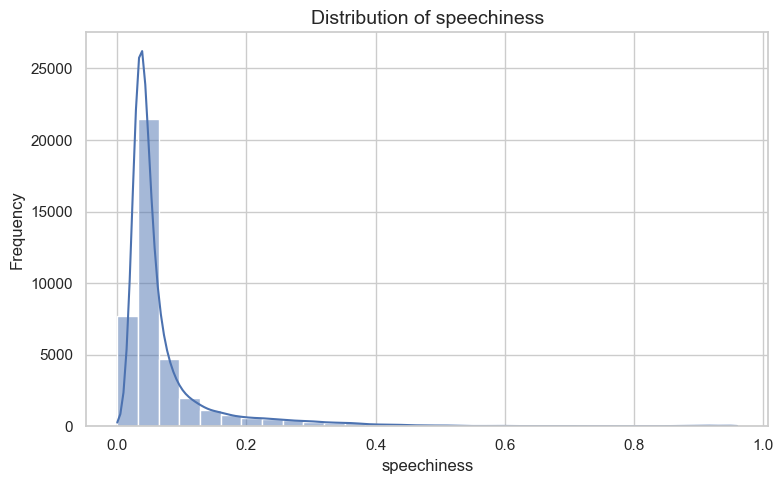

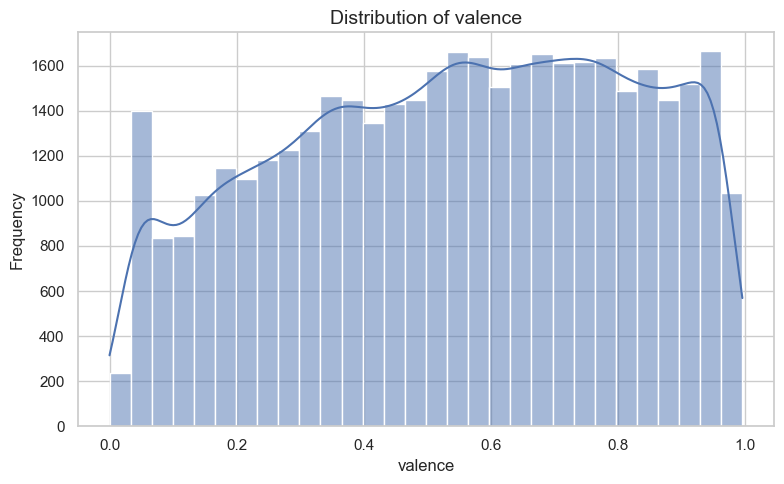

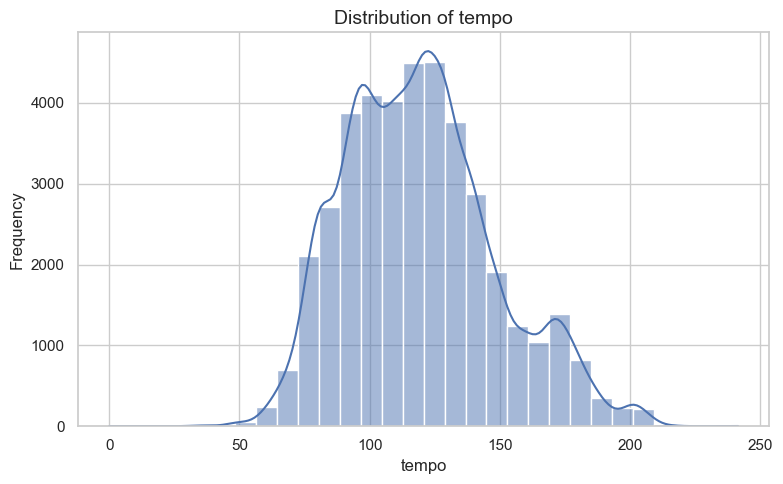

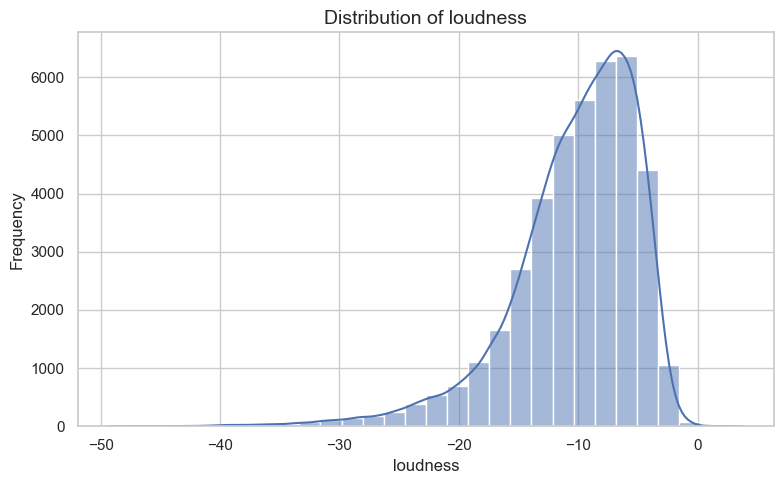

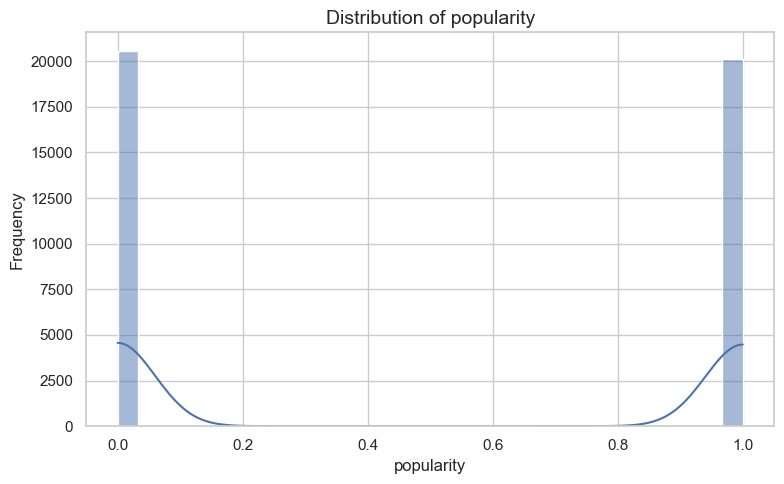

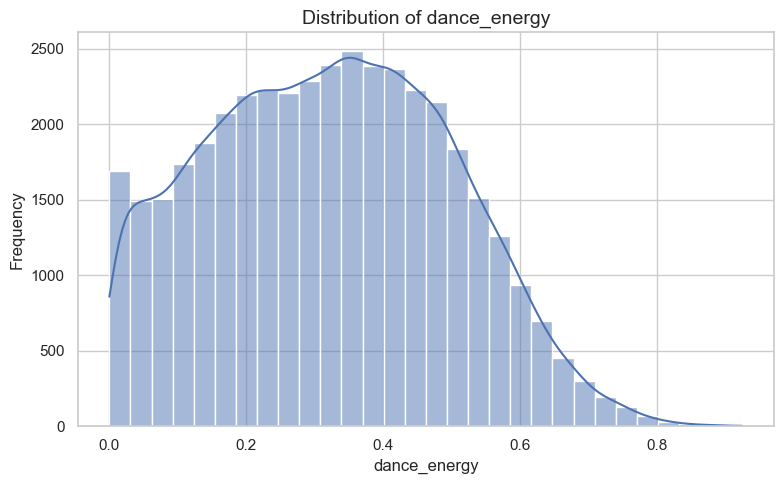

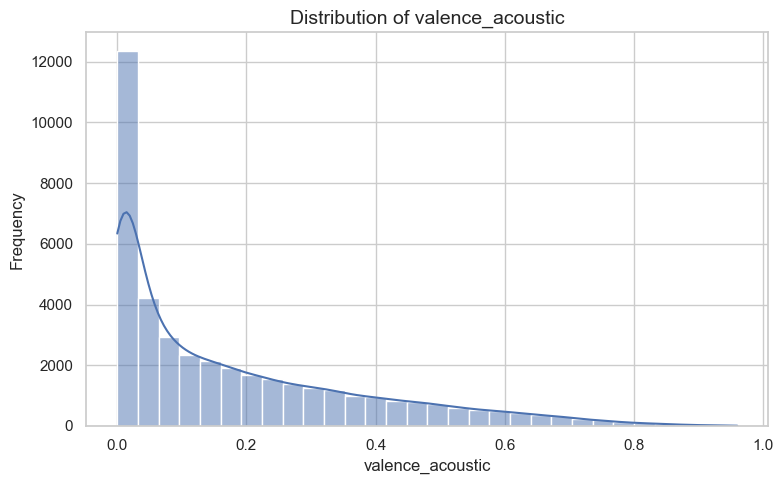

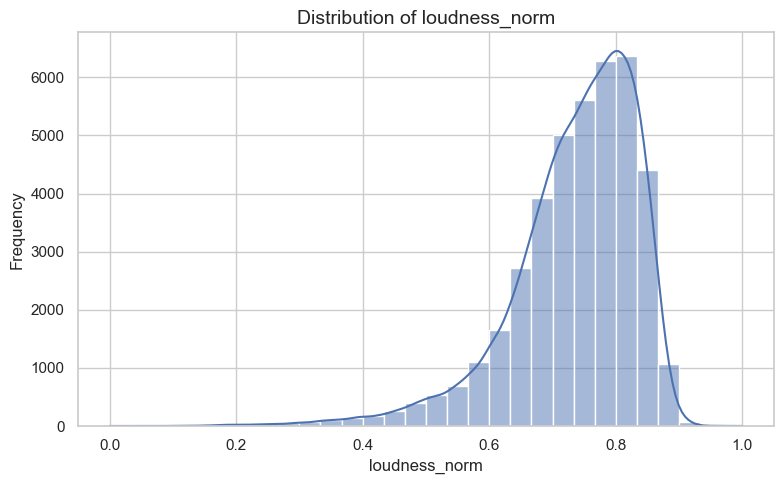

In [2]:
df.max()
df.min()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("../data/processed/cleaned_music_data.csv")

# Set style
sns.set(style="whitegrid")

# Loop through each column and plot histogram
for col in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [24]:
import pandas as pd
import glob


# Read and combine into one DataFrame
df = pd.read_csv("../data/processed/cleaned_music_data_with_decade.csv")


print(df.head())

   acousticness  danceability  energy  instrumentalness  liveness  \
0      0.693000         0.527   0.316           0.00699    0.1680   
1      0.559000         0.738   0.541           0.00000    0.0492   
2      0.693000         0.736   0.419           0.49500    0.0809   
3      0.655000         0.565   0.594           0.92600    0.6750   
4      0.000017         0.513   0.760           0.00339    0.1530   

   speechiness  valence    tempo  loudness  popularity decade  dance_energy  \
0       0.0310    0.543  116.211   -15.769           0  1990s      0.166532   
1       0.0311    0.309  134.187    -5.485           1  1990s      0.399258   
2       0.0300    0.265   93.982   -10.662           0  1990s      0.308384   
3       0.0646    0.763  114.219   -13.086           0  1990s      0.335610   
4       0.0355    0.961  153.166   -10.077           0  1990s      0.389880   

   valence_acoustic  loudness_norm  
0          0.376299       0.631809  
1          0.172731       0.825858  

             feature  importance
0   instrumentalness    0.194328
1       danceability    0.096866
2       acousticness    0.091516
3       dance_energy    0.085643
4        speechiness    0.077068
5   valence_acoustic    0.073571
6             energy    0.071138
7           loudness    0.060988
8            valence    0.057782
9      loudness_norm    0.055099
10             tempo    0.047751
11          liveness    0.041524
12      decade_1960s    0.010949
13      decade_2010s    0.009140
14      decade_1970s    0.007400
15      decade_1990s    0.006753
16      decade_2000s    0.006261
17      decade_1980s    0.006223


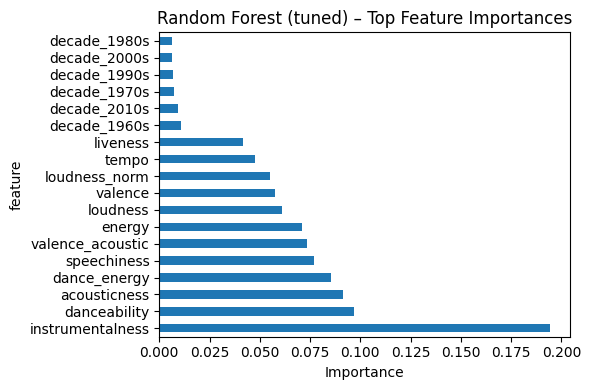

In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt

file_path = "../models/rf_tuned_with_decade_feature_importances.csv"

imp = pd.read_csv(file_path, names=["feature","importance"], header=0)
imp = imp.sort_values("importance", ascending=False)
print(imp.head(20))

imp.plot(kind="barh", x="feature", y="importance", figsize=(6,4), legend=False)
plt.title("Random Forest (tuned) – Top Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [33]:
(df['instrumentalness'] >0.3).sum()

np.int64(7816)

In [ ]:
df.max() - df.min()


In [ ]:
Q1 = df['speechiness'].quantile(0.25)
Q3 = df['speechiness'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['speechiness'] < Q1 - 1.5 * IQR) |
              (df['speechiness'] > Q3 + 1.5 * IQR)]

print(outliers.head())


    acousticness  danceability  energy  instrumentalness  liveness  \
9       0.000118         0.207  0.9890          0.134000    0.2000   
12      0.706000         0.567  0.0638          0.000000    0.4970   
30      0.449000         0.882  0.9140          0.000000    0.1060   
37      0.021100         0.561  0.7200          0.000000    0.3530   
46      0.047400         0.879  0.5640          0.000009    0.0519   

    speechiness  valence    tempo  loudness  popularity  dance_energy  \
9         0.218    0.323  200.465    -5.564           0      0.204723   
12        0.897    0.540   87.712   -27.025           0      0.036175   
30        0.160    0.810  106.672    -6.324           0      0.806148   
37        0.355    0.518   86.953    -4.854           1      0.403920   
46        0.247    0.523   93.908    -7.682           1      0.495756   

    valence_acoustic  loudness_norm  
9           0.000038       0.824367  
12          0.381240       0.419420  
30          0.363690      

In [11]:
import pandas as pd

# Load CSV
df = pd.read_csv("../models/rf_tuned_with_decade_feature_importances.csv")

# Rename columns for clarity
df.columns = ["feature", "importance"]

# Show top 10 features
print(df.head(10))

# Sort by importance (descending)
print(df.sort_values(by="importance", ascending=False).head(10))


            feature  importance
0  instrumentalness    0.194328
1      danceability    0.096866
2      acousticness    0.091516
3      dance_energy    0.085643
4       speechiness    0.077068
5  valence_acoustic    0.073571
6            energy    0.071138
7          loudness    0.060988
8           valence    0.057782
9     loudness_norm    0.055099
            feature  importance
0  instrumentalness    0.194328
1      danceability    0.096866
2      acousticness    0.091516
3      dance_energy    0.085643
4       speechiness    0.077068
5  valence_acoustic    0.073571
6            energy    0.071138
7          loudness    0.060988
8           valence    0.057782
9     loudness_norm    0.055099


In [29]:
import pandas as pd

# Use the dataset that already includes the decade one-hot columns
df = pd.read_csv("../data/processed/cleaned_music_data_with_decade.csv")

# Drop the target for inference
if "popularity" in df.columns:
    df = df.drop(columns=["popularity"])

# Take a few rows for testing
sample = df.sample(5, random_state=42)

# Save it where predict.py expects it
sample.to_csv("../data/processed/inference_sample.csv", index=False)
print("Saved ../data/processed/inference_sample.csv:", sample.shape)


Saved ../data/processed/inference_sample.csv: (5, 13)


In [ ]:
import os
import pandas as pd
import joblib

# 1) Load expected feature order from training
feat_cols = joblib.load("../models/feature_columns_with_decade.pkl")

# 2) Load a source dataset (prefer the with-decade file)
src_paths = [
    "../data/processed/cleaned_music_data_with_decade.csv",  # preferred
    "../data/processed/cleaned_music_data.csv"               # fallback
]
for p in src_paths:
    if os.path.exists(p):
        src_path = p
        break
else:
    raise FileNotFoundError("No source dataset found:\n" + "\n".join(src_paths))

df = pd.read_csv(src_path)

# 3) Drop target if present
df = df.drop(columns=["popularity"], errors="ignore")

# 4) Ensure decade dummies exist (create if missing)
decade_cols = [c for c in feat_cols if c.startswith("decade_")]
if decade_cols and not set(decade_cols).issubset(df.columns):
    # If you have a 'decade' string column, one-hot encode it; otherwise default to 2010s for testing
    if "decade" in df.columns:
        dummies = pd.get_dummies(df["decade"], prefix="decade")
        df = pd.concat([df.drop(columns=["decade"]), dummies], axis=1)
    else:
        for c in decade_cols:
            df[c] = 0
        if "decade_2010s" in df.columns:
            df["decade_2010s"] = 1

# 5) Add any remaining missing features as 0, then align order
for c in feat_cols:
    if c not in df.columns:
        df[c] = 0
X_inf = df[feat_cols].copy()

# 6) Save a small sample for inference
sample = X_inf.sample(5, random_state=42)
sample.to_csv("../data/processed/inference_sample.csv", index=False)
print("Wrote ../data/processed/inference_sample.csv with shape:", sample.shape)

# Sanity check
still_missing = [c for c in feat_cols if c not in sample.columns]
print("Still missing columns? ->", still_missing)


Wrote ../data/processed/inference_sample.csv with shape: (5, 18)
Still missing columns? -> []


In [ ]:
+ "\n".join(src_paths)

df = pd.read_csv(src_path)

# 3) Drop target if present
df = df.drop(columns=["popularity"], errors="ignore")

# 4) Ensure decade dummies exist (create if missing)
decade_cols = [c for c in feat_cols if c.startswith("decade_")]
if decade_cols and not set(decade_cols).issubset(df.columns):
    # If you have a 'decade' string column, one-hot encode it; otherwise default to 2010s for testing
    if "decade" in df.columns:
        dummies = pd.get_dummies(df["decade"], prefix="decade")
        df = pd.concat([df.drop(columns=["decade"]), dummies], axis=1)
    else:
        for c in decade_cols:
            df[c] = 0
        if "decade_2010s" in df.columns:
            df["decade_2010s"] = 1

# 5) Add any remaining missing features as 0, then align order
for c in feat_cols:
    if c not in df.columns:
        df[c] = 0
X_inf = df[feat_cols].copy()

# 6) Save a small sample for inference
sample = X_inf.sample(5, random_state=42)
sample.to_csv("../data/processed/inference_sample.csv", index=False)
print("Wrote ../data/processed/inference_sample.csv with shape:", sample.shape)

# Sanity check
still_missing = [c for c in feat_cols if c not in sample.columns]
print("Still missing columns? ->", still_missing)


In [38]:
import pandas as pd

preds = pd.read_csv("../predictions.csv")
shap_vals = pd.read_csv("../shap_values.csv")     # shape: (n_rows, n_features)

print(preds.head())
print(shap_vals.shape)  # should match (rows in inference_sample) x (num features)


   hit_proba  hit_pred
0   0.835979         1
1   0.297694         0
2   0.246288         0
3   0.370429         0
4   0.981600         1
(5, 18)


In [ ]:
import pandas as pd

# Load inference sample (without popularity)
X = pd.read_csv("../data/processed/inference_sample.csv")

# Load the model's feature schema (saved during training)
feature_cols = pd.read_pickle("../models/feature_columns_with_decade.pkl")

# Align input columns with training schema
X = X[feature_cols]

# Load predictions and SHAP values
preds = pd.read_csv("../predictions.csv")
shap_vals = pd.read_csv("../shap_values.csv")

# Pick one row to inspect
row = 0

pd.set_option("display.max_rows", 100)
contribs = pd.DataFrame({
    "feature": feature_cols,
    "value": X.iloc[row].values,
    "shap": shap_vals.iloc[row].values
}).sort_values("shap", ascending=False)

print(contribs.head(10))


             feature     value      shap
3   instrumentalness       0.0  0.126788
10  valence_acoustic  0.045208  0.068565
0       acousticness    0.0606  0.068195
2             energy     0.626  0.033019
9       dance_energy  0.332406  0.029216
4           liveness    0.0767  0.020060
6            valence     0.746  0.016442
5        speechiness    0.0452  0.011062
1       danceability     0.531  0.008954
17      decade_2010s     False  0.008710


In [ ]:

# Pick one row to inspect
row = 1

pd.set_option("display.max_rows", 100)
contribs = pd.DataFrame({
    "feature": feature_cols,
    "value": X.iloc[row].values,
    "shap": shap_vals.iloc[row].values
}).sort_values("shap", ascending=False)

print(contribs.head(10))  # top 10 contributing features for row 0


         feature   value      shap
1   danceability    0.75  0.053793
9   dance_energy  0.5955  0.043570
17  decade_2010s   False  0.013250
6        valence   0.875  0.012315
16  decade_2000s   False  0.003430
12  decade_1960s    True  0.002757
14  decade_1980s   False -0.000267
15  decade_1990s   False -0.001415
2         energy   0.794 -0.006416
13  decade_1970s   False -0.010231


In [ ]:
import pandas as pd

# Load everything
X = pd.read_csv("../data/processed/inference_sample.csv")
feature_cols = pd.read_pickle("../models/feature_columns_with_decade.pkl")
X = X[feature_cols]  # align columns

preds = pd.read_csv("../predictions.csv")
shap_vals = pd.read_csv("../shap_values.csv")  # shape: (n_rows, n_features)

# Build long-form SHAP contributions (richer version)
rows = []
for i in range(X.shape[0]):
    rows.append(pd.DataFrame({
        "row": i,
        "feature": feature_cols,
        "value": X.iloc[i].values,
        "shap": shap_vals.iloc[i].values,
        "hit_proba": preds.loc[i, "hit_proba"],
        "hit_pred": preds.loc[i, "hit_pred"],
    }))
all_contribs = pd.concat(rows, ignore_index=True)

# Save for Excel/Power BI and analysis
out_path = "../data/processed/shap_contributions.csv"
all_contribs.to_csv(out_path, index=False)
print("Saved:", out_path, all_contribs.shape)


Saved: ../data/processed/shap_contributions.csv (90, 6)


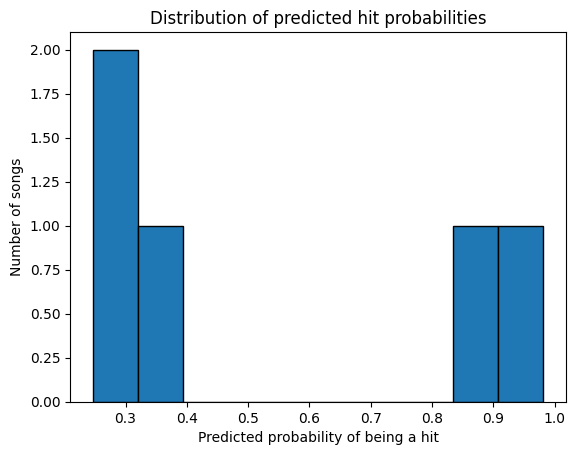

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

preds = pd.read_csv("../predictions.csv")

plt.hist(preds["hit_proba"], bins=10, edgecolor="k")
plt.xlabel("Predicted probability of being a hit")
plt.ylabel("Number of songs")
plt.title("Distribution of predicted hit probabilities")
plt.show()


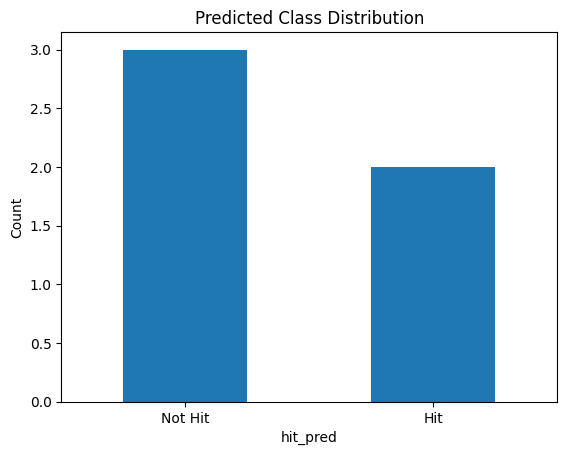

In [6]:
preds["hit_pred"].value_counts().plot(kind="bar")
plt.xticks([0,1], ["Not Hit", "Hit"], rotation=0)
plt.ylabel("Count")
plt.title("Predicted Class Distribution")
plt.show()


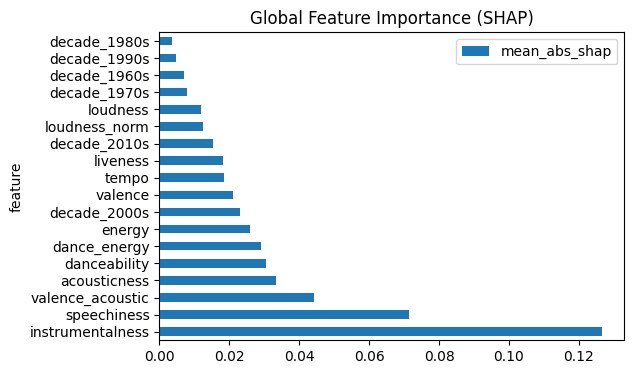

In [7]:
import numpy as np

shap_vals = pd.read_csv("../shap_values.csv")
feature_cols = pd.read_pickle("../models/feature_columns_with_decade.pkl")

mean_abs_shap = shap_vals.abs().mean().values
importance = pd.DataFrame({
    "feature": feature_cols,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

importance.plot(kind="barh", x="feature", y="mean_abs_shap", figsize=(6,4))
plt.title("Global Feature Importance (SHAP)")
plt.show()


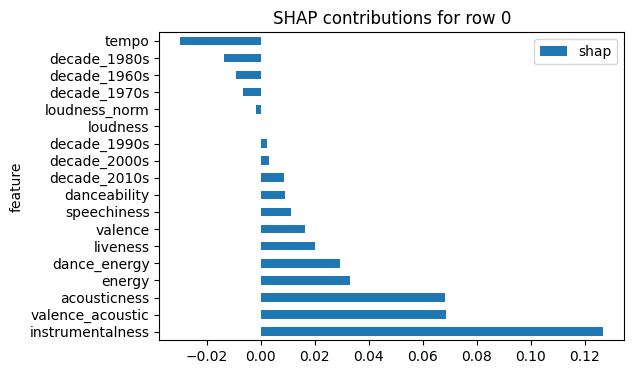

In [8]:
row = 0  # pick any row
X = pd.read_csv("../data/processed/inference_sample.csv")
X = X[feature_cols]

contribs = pd.DataFrame({
    "feature": feature_cols,
    "value": X.iloc[row].values,
    "shap": shap_vals.iloc[row].values
}).sort_values("shap", ascending=False)

contribs.plot(kind="barh", x="feature", y="shap", figsize=(6,4))
plt.title(f"SHAP contributions for row {row}")
plt.show()


[info] model classes_: [np.int64(0), np.int64(1)]
[info] New API: values shape: (5, 18, 2)


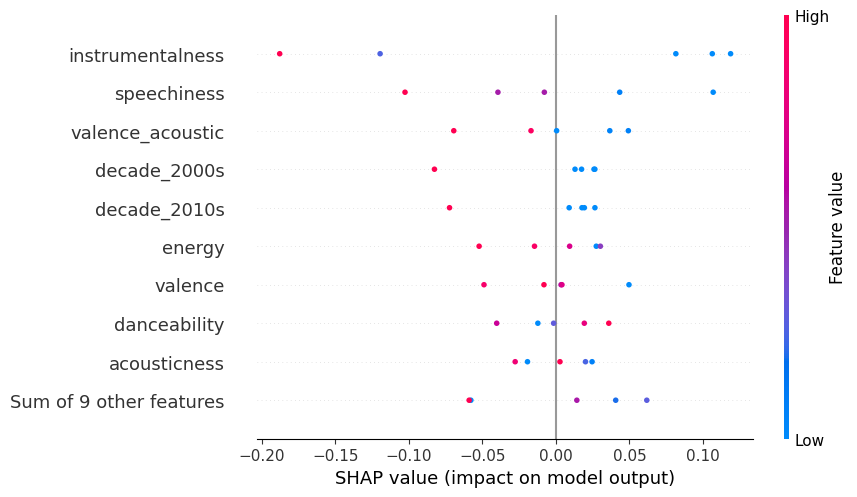

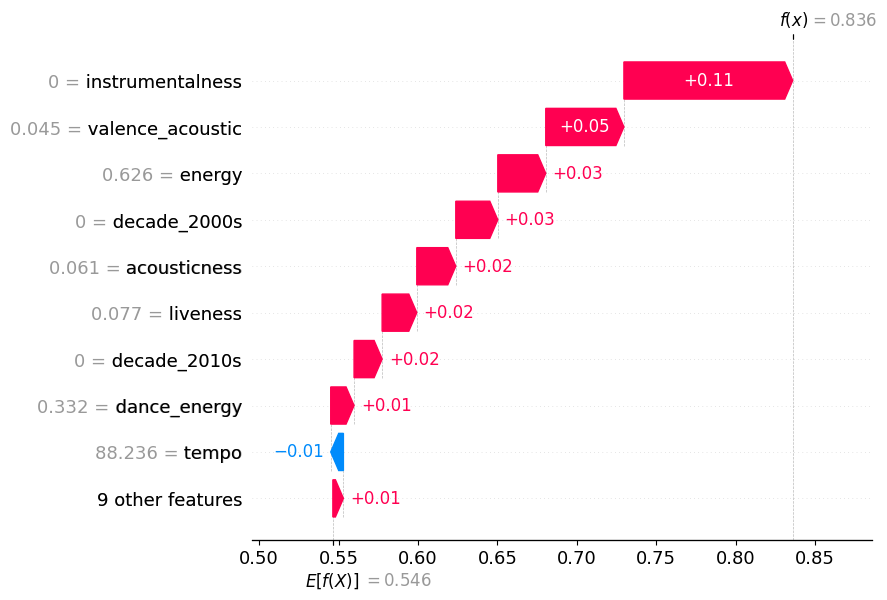

In [62]:
import joblib
import pandas as pd
import shap
import numpy as np

# --- Load model and inputs ---
model = joblib.load("../models/rf_tuned_with_decade.pkl")
X = pd.read_csv("../data/processed/inference_sample.csv")
feature_cols = pd.read_pickle("../models/feature_columns_with_decade.pkl")
X = X[feature_cols].astype(float)

# Determine which class index is the positive class (assumes binary 0/1)
if hasattr(model, "classes_"):
    classes = list(model.classes_)
    print("[info] model classes_:", classes)
    pos_idx = classes.index(1) if 1 in classes else (1 if len(classes) > 1 else 0)
else:
    pos_idx = 1  # reasonable default for binary

def try_new_api():
    # Force tree explainer path for tree models and get multi-output Explanation
    explainer = shap.Explainer(model, X, feature_names=feature_cols, algorithm="tree")
    ex = explainer(X)  # shap.Explanation
    print("[info] New API: values shape:", getattr(ex.values, "shape", None))

    # If 3D (n_samples, n_features, n_classes), select positive class into a new Explanation
    if hasattr(ex, "values") and ex.values.ndim == 3:
        ex_pos = shap.Explanation(
            values=ex.values[:, :, pos_idx],
            base_values=ex.base_values[:, pos_idx] if np.ndim(ex.base_values) == 2 else ex.base_values,
            data=ex.data,
            feature_names=ex.feature_names
        )
    else:
        ex_pos = ex

    # Global beeswarm (now 2D)
    shap.plots.beeswarm(ex_pos)

    # Local waterfall for row 0
    shap.plots.waterfall(ex_pos[0])

def try_classic_api():
    # Classic TreeExplainer configured for probabilities + interventional perturbation
    explainer = shap.TreeExplainer(
        model,
        feature_perturbation="interventional",
        model_output="probability",
    )
    sv_list = explainer.shap_values(X)        # list of arrays per class
    base_list = explainer.expected_value      # list of base values per class
    print("[info] Classic API: class count =", len(sv_list))

    # Pick positive class
    sv = sv_list[pos_idx]                     # shape: (n_samples, n_features)
    base = base_list[pos_idx]                 # scalar

    # Global summary
    shap.summary_plot(sv, X, feature_names=feature_cols)

    # Local waterfall for row 0 (build Explanation by hand)
    i = 0
    exp = shap.Explanation(values=sv[i],
                           base_values=base,
                           data=X.iloc[i].values,
                           feature_names=feature_cols)
    shap.waterfall_plot(exp)

# Try new API → fallback to classic if needed
try:
    try_new_api()
except Exception as e:
    print("[warn] New API failed, falling back to classic. Reason:", repr(e))
    try_classic_api()

In [3]:
import numpy as np
import pandas as pd
import joblib
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay,
    classification_report
)

ROOT = Path.cwd().parents[0] if (Path.cwd().name == "notebooks") else Path.cwd()
MODELS_DIR = ROOT / "models"

def load_model_and_schema():
    # Preference order: tuned RF with decade → tuned RF → RF → Logistic
    for m, s in [
        ("rf_tuned_with_decade.pkl", "feature_columns_with_decade.pkl"),
        ("rf_tuned.pkl", "feature_columns.pkl"),
        ("random_forest.pkl", "feature_columns.pkl"),
        ("logistic_pipeline.pkl", "feature_columns.pkl"),
    ]:
        mp, sp = MODELS_DIR / m, MODELS_DIR / s
        if mp.exists() and sp.exists():
            model = joblib.load(mp)
            feature_cols = joblib.load(sp)
            print(f"[info] Loaded model: {m}")
            print(f"[info] Loaded schema: {s} ({len(feature_cols)} features)")
            return model, feature_cols
    raise FileNotFoundError("No model/schema pair found in models/")

def ensure_columns(df, feature_cols):
    df = df.copy()
    # fill missing expected cols
    for c in feature_cols:
        if c not in df.columns:
            df[c] = 0
    # one-hot decade safety
    dec_cols = [c for c in feature_cols if c.startswith("decade_")]
    if dec_cols:
        none_set = (df[dec_cols].sum(axis=1) == 0)
        if none_set.any() and ("decade_2010s" in df.columns):
            df.loc[none_set, "decade_2010s"] = 1
    return df[feature_cols]

def predict_proba_and_label(model, X, threshold=0.5):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        proba = 1/(1+np.exp(-scores))
    else:
        proba = model.predict(X).astype(float)
    y_pred = (proba >= threshold).astype(int)
    return proba, y_pred


In [4]:
# Choose a labeled CSV. Must include the ground truth column, typically "popularity" ∈ {0,1}
csv_path = ROOT / "data" / "processed" / "cleaned_music_data_with_decade.csv"
label_col = "popularity"   # change if your label column has a different name

df = pd.read_csv(csv_path)
assert label_col in df.columns, f"Label column '{label_col}' not found in {csv_path}"

y_true = df[label_col].astype(int).values
X_raw = df.drop(columns=[label_col], errors="ignore")

model, feature_cols = load_model_and_schema()
X = ensure_columns(X_raw, feature_cols)

X.shape, y_true.shape


[info] Loaded model: rf_tuned_with_decade.pkl
[info] Loaded schema: feature_columns_with_decade.pkl (18 features)


((41106, 18), (41106,))

In [5]:
threshold = 0.50  # adjust to taste
proba, y_pred = predict_proba_and_label(model, X, threshold=threshold)

acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)

try:
    roc = roc_auc_score(y_true, proba)
except Exception:
    roc = float("nan")

try:
    pr_auc = average_precision_score(y_true, proba)
except Exception:
    pr_auc = float("nan")

print(f"Threshold = {threshold:.2f}")
print(f"Accuracy  = {acc:.3f}")
print(f"Precision = {prec:.3f}")
print(f"Recall    = {rec:.3f}")
print(f"F1        = {f1:.3f}")
print(f"ROC-AUC   = {roc:.3f}" if not np.isnan(roc) else "ROC-AUC   = N/A")
print(f"PR-AUC    = {pr_auc:.3f}" if not np.isnan(pr_auc) else "PR-AUC    = N/A")

print("\nClassification report:\n")
print(classification_report(y_true, y_pred, digits=3))


Threshold = 0.50
Accuracy  = 0.867
Precision = 0.936
Recall    = 0.788
F1        = 0.856
ROC-AUC   = 0.955
PR-AUC    = 0.951

Classification report:

              precision    recall  f1-score   support

           0      0.817     0.946     0.877     20553
           1      0.936     0.788     0.856     20553

    accuracy                          0.867     41106
   macro avg      0.876     0.867     0.866     41106
weighted avg      0.876     0.867     0.866     41106



In [6]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
cm_df = pd.DataFrame(cm, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])
cm_df


Pred 0  Pred 1
True 0   19446    1107
True 1    4357   16196

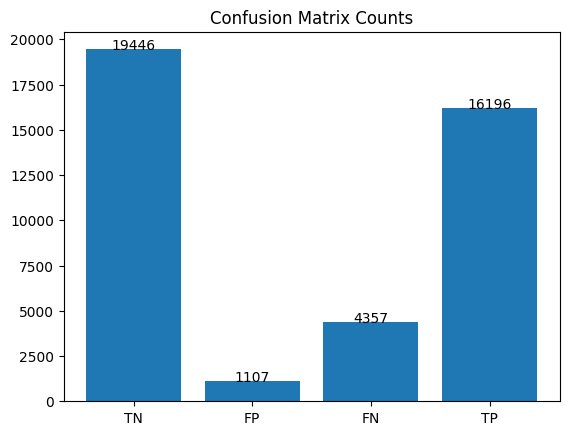

In [7]:
# Simple bar view of confusion matrix entries
fig, ax = plt.subplots()
bars = ax.bar(["TN","FP","FN","TP"], cm.ravel())
ax.set_title("Confusion Matrix Counts")
for b, v in zip(bars, cm.ravel()):
    ax.text(b.get_x() + b.get_width()/2, b.get_height()+0.5, str(v), ha='center')
plt.show()


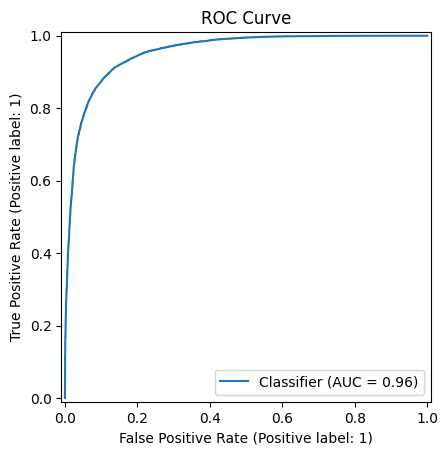

In [8]:
# ROC curve
fig, ax = plt.subplots()
try:
    RocCurveDisplay.from_predictions(y_true, proba, ax=ax)
    ax.set_title("ROC Curve")
except Exception as e:
    print("ROC curve not available:", e)
plt.show()


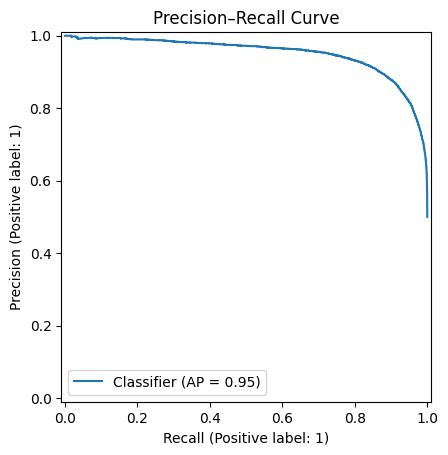

In [9]:
# Precision–Recall curve
fig, ax = plt.subplots()
try:
    PrecisionRecallDisplay.from_predictions(y_true, proba, ax=ax)
    ax.set_title("Precision–Recall Curve")
except Exception as e:
    print("PR curve not available:", e)
plt.show()


In [10]:
dec_cols = [c for c in feature_cols if c.startswith("decade_")]
if dec_cols:
    # infer each row's decade from one-hot
    dec_ix = X[dec_cols].values.argmax(axis=1)
    dec_names = np.array(dec_cols)[dec_ix]
    eval_df = pd.DataFrame({"decade": dec_names, "y_true": y_true, "y_pred": y_pred})

    rows = []
    for d in dec_cols:
        sub = eval_df[eval_df["decade"] == d]
        if sub.empty:
            continue
        acc_d  = accuracy_score(sub["y_true"], sub["y_pred"])
        prec_d = precision_score(sub["y_true"], sub["y_pred"], zero_division=0)
        rec_d  = recall_score(sub["y_true"], sub["y_pred"], zero_division=0)
        f1_d   = f1_score(sub["y_true"], sub["y_pred"], zero_division=0)
        rows.append([d, len(sub), acc_d, prec_d, rec_d, f1_d])

    pd.DataFrame(rows, columns=["decade","N","Accuracy","Precision","Recall","F1"]).sort_values("decade")
else:
    print("No decade dummies in schema—skipping per-decade breakdown.")


In [11]:
cand = np.unique(np.concatenate([[0.0, 1.0], proba]))
cand = np.clip(cand, 0.0, 1.0)

best_f1, best_f1_thr = -1.0, 0.5
best_j, best_j_thr = -1.0, 0.5

for t in cand:
    yp = (proba >= t).astype(int)
    f1_t = f1_score(y_true, yp, zero_division=0)
    if f1_t > best_f1:
        best_f1, best_f1_thr = f1_t, t
    # Youden’s J = TPR - FPR
    tn, fp, fn, tp = confusion_matrix(y_true, yp, labels=[0,1]).ravel()
    tpr = tp / (tp + fn) if (tp + fn) else 0.0
    fpr = fp / (fp + tn) if (fp + tn) else 0.0
    j = tpr - fpr
    if j > best_j:
        best_j, best_j_thr = j, t

print(f"Best F1 threshold: {best_f1_thr:.3f} (F1={best_f1:.3f})")
print(f"Best Youden’s J threshold: {best_j_thr:.3f} (J={best_j:.3f})")


Best F1 threshold: 0.371 (F1=0.890)
Best Youden’s J threshold: 0.395 (J=0.776)


In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

dec_cols = [c for c in feature_cols if c.startswith("decade_")]
if dec_cols:
    dec_ix = X[dec_cols].values.argmax(axis=1)
    dec_names = np.array(dec_cols)[dec_ix]

    eval_df = pd.DataFrame({
        "decade": dec_names,
        "y_true": y_true,
        "y_pred": y_pred
    })

    rows = []
    for d in dec_cols:
        sub = eval_df[eval_df["decade"] == d]
        if sub.empty:
            continue
        acc_d  = accuracy_score(sub["y_true"], sub["y_pred"])
        prec_d = precision_score(sub["y_true"], sub["y_pred"], zero_division=0)
        rec_d  = recall_score(sub["y_true"], sub["y_pred"], zero_division=0)
        f1_d   = f1_score(sub["y_true"], sub["y_pred"], zero_division=0)
        rows.append([d, len(sub), acc_d, prec_d, rec_d, f1_d])

    per_decade = pd.DataFrame(rows, columns=["decade","N","Accuracy","Precision","Recall","F1"])\
                   .sort_values("decade")
    display(per_decade)          # <-- show it
else:
    print("No decade dummies in schema—skipping per-decade breakdown.")


decade      N  Accuracy  Precision    Recall        F1
0  decade_2010s  41106  0.867075   0.936023  0.788011  0.855664

In [13]:
per_decade.to_csv("../data/processed/per_decade_metrics.csv", index=False)
print("Saved to ../data/processed/per_decade_metrics.csv")
per_decade.head()  # will render in Jupyter if this is the last line


Saved to ../data/processed/per_decade_metrics.csv


decade      N  Accuracy  Precision    Recall        F1
0  decade_2010s  41106  0.867075   0.936023  0.788011  0.855664

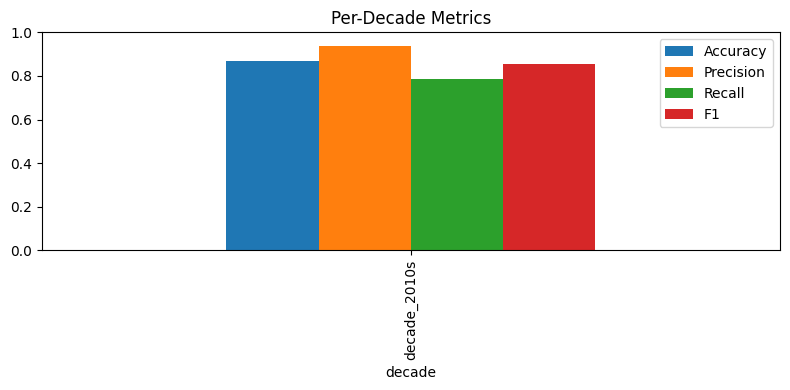

In [14]:
import matplotlib.pyplot as plt

ax = per_decade.plot(x="decade", y=["Accuracy","Precision","Recall","F1"], kind="bar", figsize=(8,4))
ax.set_ylim(0,1)
ax.set_title("Per-Decade Metrics")
plt.tight_layout()
plt.show()


In [20]:
from pathlib import Path
import joblib, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Optional SHAP (plots saved as PNGs if available)
try:
    import shap
    SHAP_AVAILABLE = True
except Exception:
    SHAP_AVAILABLE = False

ROOT_NOTEBOOKS = Path.cwd().resolve()
PROJ = ROOT_NOTEBOOKS.parent
DATA = PROJ / "data" / "processed"
MODELS = PROJ / "models"
REPORTS = PROJ / "reports"
REPORTS.mkdir(parents=True, exist_ok=True)
print("PROJ:", PROJ)
print("DATA:", DATA)
print("MODELS:", MODELS)
print("REPORTS:", REPORTS)


PROJ: /Users/Shared/Documents/music-popularity-predictor
DATA: /Users/Shared/Documents/music-popularity-predictor/data/processed
MODELS: /Users/Shared/Documents/music-popularity-predictor/models
REPORTS: /Users/Shared/Documents/music-popularity-predictor/reports


In [21]:
# Try the with-decade file first (recommended)
clean_path = DATA / "cleaned_music_data_with_decade.csv"
if not clean_path.exists():
    clean_path = DATA / "cleaned_music_data.csv"

df = pd.read_csv(clean_path)
df.columns = df.columns.str.strip()

# Ensure binary label column
label_col = "popularity" if "popularity" in df.columns else None
if label_col is None:
    raise ValueError("Could not find 'popularity' column in processed data.")

# Separate features/target exactly as used in training
y = df[label_col].astype(int).values
X = df.drop(columns=[label_col], errors="ignore")

# Load feature schema (prefer with-decade)
schema_candidates = ["feature_columns_with_decade.pkl", "feature_columns.pkl"]
for s in schema_candidates:
    schema_path = MODELS / s
    if schema_path.exists():
        feature_cols = joblib.load(schema_path)
        break
else:
    raise FileNotFoundError("No feature schema found in models/. Train first.")

# Ensure all expected columns exist; fill missing with 0; order columns
for c in feature_cols:
    if c not in X.columns:
        X[c] = 0
X = X[feature_cols]

print(X.shape, "features aligned to schema:", len(feature_cols))
print("Columns head:", feature_cols[:8], "...")


(41106, 18) features aligned to schema: 18
Columns head: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'tempo'] ...


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train:", X_train.shape, " Test:", X_test.shape, " Positives in test:", y_test.sum())


Train: (32884, 18)  Test: (8222, 18)  Positives in test: 4111


In [35]:
model_paths = [
    ("Logistic (pipeline)", MODELS / "logistic_pipeline.pkl"),
    ("Random Forest (base)", MODELS / "random_forest.pkl"),
    ("RF Tuned", MODELS / "rf_tuned.pkl"),
    ("RF Tuned + Decade (FINAL)", MODELS / "rf_tuned_with_decade.pkl"),
]

models = []
for name, p in model_paths:
    if p.exists():
        models.append((name, joblib.load(p)))
        print("Loaded:", name, "from", p.name)

if not models:
    raise FileNotFoundError("No models found in models/. Re-run training.")


Loaded: Logistic (pipeline) from logistic_pipeline.pkl
Loaded: Random Forest (base) from random_forest.pkl
Loaded: RF Tuned from rf_tuned.pkl
Loaded: RF Tuned + Decade (FINAL) from rf_tuned_with_decade.pkl


In [36]:
def score_model(model, X_eval, y_eval, threshold=0.50):
    # Probabilities
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_eval)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_eval)
        proba = 1 / (1 + np.exp(-scores))
    else:
        proba = model.predict(X_eval).astype(float)

    # Binary prediction at threshold
    y_pred = (proba >= threshold).astype(int)

    # Metrics
    acc  = accuracy_score(y_eval, y_pred)
    prec = precision_score(y_eval, y_pred, zero_division=0)
    rec  = recall_score(y_eval, y_pred, zero_division=0)
    f1   = f1_score(y_eval, y_pred, zero_division=0)
    roc  = roc_auc_score(y_eval, proba) if len(np.unique(y_eval)) > 1 else np.nan
    pr   = average_precision_score(y_eval, proba) if len(np.unique(y_eval)) > 1 else np.nan

    return {
        "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1,
        "ROC-AUC": roc, "PR-AUC": pr, "proba": proba, "y_pred": y_pred
    }


In [ ]:
# --- Helpers to align feature schema per model ---
def model_expected_features(model, fallback_features):
    """Return the exact feature list the model was trained with."""
    feats = getattr(model, "feature_names_in_", None)
    if feats is not None:
        return list(feats)
    # Pipelines may store it on the final step too
    if hasattr(model, "steps") and len(model.steps) > 0:
        last = model.steps[-1][1]
        feats = getattr(last, "feature_names_in_", None)
        if feats is not None:
            return list(feats)
    return list(fallback_features)

def align_X_for_model(X_full, model_features):
    """Return X aligned to model_features: add missing cols=0, keep order, drop extras."""
    X = X_full.copy()
    # add missing
    for c in model_features:
        if c not in X.columns:
            X[c] = 0
    # keep only expected & in the right order
    return X[model_features]


In [39]:
THRESHOLD = 0.50
rows = []
per_model_outputs = {}

rows_list = []  # for building the comparison table
for name, model in models:
    # determine the features this model expects
    model_feats = model_expected_features(model, feature_cols)
    # align X_test to the model
    X_test_for_model = align_X_for_model(X_test, model_feats)

    # score as usual
    res = score_model(model, X_test_for_model, y_test, threshold=THRESHOLD)

    rows_list.append([name, res["Accuracy"], res["Precision"], res["Recall"], res["F1"],
                      res.get("ROC-AUC", float("nan")), res.get("PR-AUC", float("nan"))])
    per_model_outputs[name] = res

table1 = pd.DataFrame(rows_list,
                      columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC", "PR-AUC"])
display(table1)
table1.to_csv(REPORTS / "table_model_comparison.csv", index=False)
print("Saved Table I →", REPORTS / "table_model_comparison.csv")


Model  Accuracy  Precision    Recall        F1  \
0        Logistic (pipeline)  0.736804   0.712138  0.794940  0.751264   
1       Random Forest (base)  0.842374   0.778327  0.957431  0.858639   
2                   RF Tuned  0.824860   0.771057  0.924106  0.840673   
3  RF Tuned + Decade (FINAL)  0.772683   0.763517  0.790075  0.776569   

    ROC-AUC    PR-AUC  
0  0.809948  0.770677  
1  0.945886  0.941780  
2  0.910199  0.893998  
3  0.855310  0.832692

Saved Table I → /Users/Shared/Documents/music-popularity-predictor/reports/table_model_comparison.csv


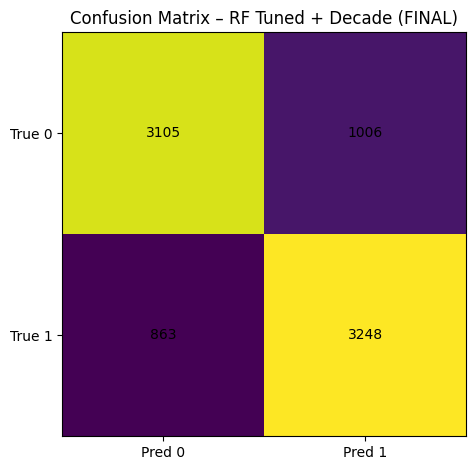

Saved → /Users/Shared/Documents/music-popularity-predictor/reports/fig_confusion_matrix_final.png


In [40]:
# Pick the final model (prefers tuned + decade if present)
final_name = None
final_model = None
for name, model in models[::-1]:  # reverse to favor last in the list
    if "FINAL" in name or "Decade" in name:
        final_name, final_model = name, model
        break
if final_model is None:
    final_name, final_model = models[-1]  # fallback

res_final = per_model_outputs[final_name]
cm = confusion_matrix(y_test, res_final["y_pred"], labels=[0, 1])

fig, ax = plt.subplots()
ax.imshow(cm, interpolation="nearest")
ax.set_title(f"Confusion Matrix – {final_name}")
ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
ax.set_xticklabels(["Pred 0", "Pred 1"]); ax.set_yticklabels(["True 0", "True 1"])
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha="center", va="center")
plt.tight_layout()
fig.savefig(REPORTS / "fig_confusion_matrix_final.png", dpi=200)
plt.show()
print("Saved →", REPORTS / "fig_confusion_matrix_final.png")


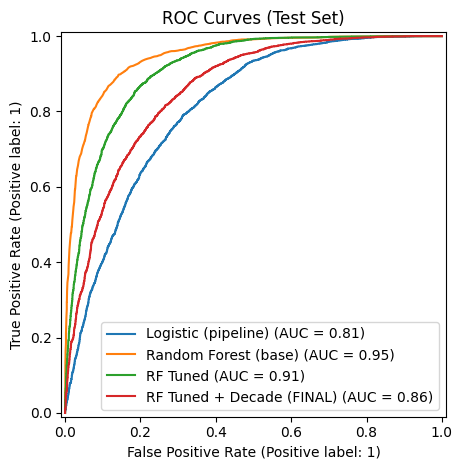

Saved → /Users/Shared/Documents/music-popularity-predictor/reports/fig_roc_curves.png


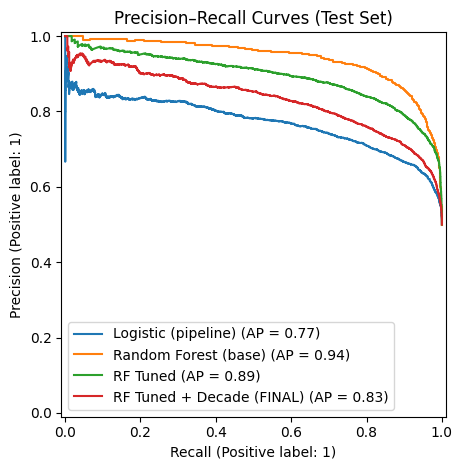

Saved → /Users/Shared/Documents/music-popularity-predictor/reports/fig_pr_curves.png


In [41]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import numpy as np
import matplotlib.pyplot as plt

# Collect only models that produced valid probabilities
curves = []
for name, _ in models:
    proba = per_model_outputs.get(name, {}).get("proba", None)
    if proba is None:
        print(f"[warn] Skipping {name}: no probabilities stored.")
        continue
    # Guard against NaNs or wrong length
    proba = np.asarray(proba)
    if (proba.shape[0] != y_test.shape[0]) or np.isnan(proba).any():
        print(f"[warn] Skipping {name}: invalid proba shape/NaNs.")
        continue
    curves.append((name, proba))

if not curves:
    print("[warn] No models with valid probabilities to plot.")
else:
    # ROC
    fig_roc, ax_roc = plt.subplots()
    plotted_any = False
    for name, proba in curves:
        try:
            RocCurveDisplay.from_predictions(y_test, proba, ax=ax_roc, name=name)
            plotted_any = True
        except Exception as e:
            print(f"[warn] ROC failed for {name}: {e}")
    if plotted_any:
        ax_roc.set_title("ROC Curves (Test Set)")
        ax_roc.legend(loc="lower right")
        plt.tight_layout()
        out_roc = REPORTS / "fig_roc_curves.png"
        fig_roc.savefig(out_roc, dpi=200)
        plt.show()
        print("Saved →", out_roc)
    else:
        plt.close(fig_roc)
        print("[warn] No ROC curves could be plotted (possibly single-class y_test).")

    # Precision–Recall
    fig_pr, ax_pr = plt.subplots()
    plotted_any = False
    for name, proba in curves:
        try:
            PrecisionRecallDisplay.from_predictions(y_test, proba, ax=ax_pr, name=name)
            plotted_any = True
        except Exception as e:
            print(f"[warn] PR failed for {name}: {e}")
    if plotted_any:
        ax_pr.set_title("Precision–Recall Curves (Test Set)")
        ax_pr.legend(loc="lower left")
        plt.tight_layout()
        out_pr = REPORTS / "fig_pr_curves.png"
        fig_pr.savefig(out_pr, dpi=200)
        plt.show()
        print("Saved →", out_pr)
    else:
        plt.close(fig_pr)
        print("[warn] No PR curves could be plotted (possibly single-class y_test).")


In [42]:
dec_cols = [c for c in feature_cols if c.startswith("decade_")]
rows = []

if dec_cols:
    dec_ix = X_test[dec_cols].values.argmax(axis=1)
    dec_names = np.array(dec_cols)[dec_ix]
    df_eval = pd.DataFrame({"decade": dec_names, "y_true": y_test, "y_pred": res_final["y_pred"]})
    for d in dec_cols:
        sub = df_eval[df_eval["decade"] == d]
        if sub.empty:
            continue
        acc_d  = accuracy_score(sub["y_true"], sub["y_pred"])
        prec_d = precision_score(sub["y_true"], sub["y_pred"], zero_division=0)
        rec_d  = recall_score(sub["y_true"], sub["y_pred"], zero_division=0)
        f1_d   = f1_score(sub["y_true"], sub["y_pred"], zero_division=0)
        rows.append([d, len(sub), acc_d, prec_d, rec_d, f1_d])

    table2 = pd.DataFrame(rows, columns=["Decade", "N", "Accuracy", "Precision", "Recall", "F1"]).sort_values("Decade")
    display(table2)
    table2.to_csv(REPORTS / "table_per_decade_metrics.csv", index=False)
    print("Saved Table II →", REPORTS / "table_per_decade_metrics.csv")
else:
    print("No decade dummies in schema — skipping per-decade breakdown.")


Decade     N  Accuracy  Precision    Recall        F1
0  decade_1960s  8222  0.772683   0.763517  0.790075  0.776569

Saved Table II → /Users/Shared/Documents/music-popularity-predictor/reports/table_per_decade_metrics.csv


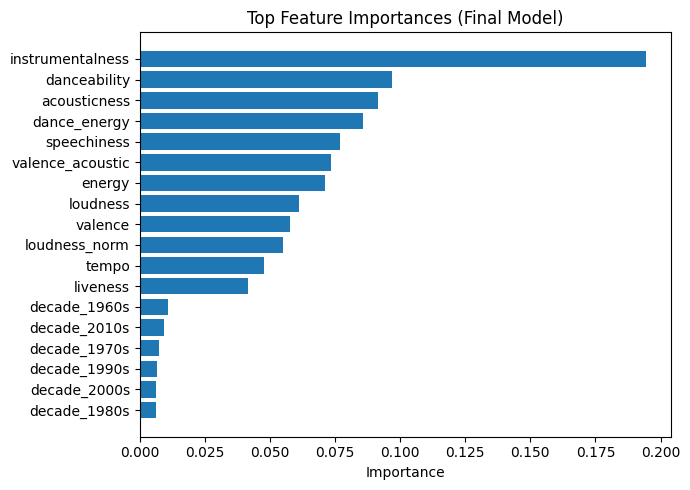

Saved → /Users/Shared/Documents/music-popularity-predictor/reports/fig_feature_importances.png


In [43]:
# Prefer the importance CSV if present (from training script)
imp_paths = [
    MODELS / "rf_tuned_feature_importances_with_decade.csv",
    MODELS / "rf_tuned_with_decade_feature_importances.csv",
    MODELS / "rf_tuned_feature_importances.csv",
]

imp_df = None
for p in imp_paths:
    if p.exists():
        tmp = pd.read_csv(p)
        if "feature" in tmp.columns and "importance" in tmp.columns:
            imp_df = tmp.copy()
            break
        if "Unnamed: 0" in tmp.columns and tmp.shape[1] == 2:
            tmp.columns = ["feature", "importance"]
            imp_df = tmp.copy()
            break

if imp_df is None and hasattr(final_model, "feature_importances_"):
    imp_df = pd.DataFrame({
        "feature": feature_cols,
        "importance": final_model.feature_importances_
    })

if imp_df is not None:
    imp_plot = imp_df.sort_values("importance", ascending=False).head(20)
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.barh(imp_plot["feature"][::-1], imp_plot["importance"][::-1])
    ax.set_xlabel("Importance")
    ax.set_title("Top Feature Importances (Final Model)")
    plt.tight_layout()
    fig.savefig(REPORTS / "fig_feature_importances.png", dpi=200)
    plt.show()
    print("Saved →", REPORTS / "fig_feature_importances.png")
else:
    print("No importances available to plot.")


[info] Using model: rf_tuned_with_decade.pkl
[info] Using schema: feature_columns_with_decade.pkl (n_features=18)


 99%|===================| 397/400 [02:25<00:01]        

[info] SHAP computed mode=interventional, bg=200, eval_rows=200


<Figure size 640x480 with 0 Axes>

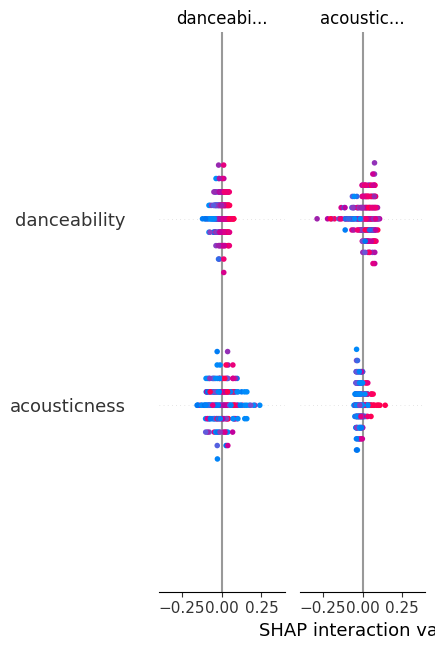

Saved → /Users/Shared/Documents/music-popularity-predictor/reports/fig_shap_beeswarm.png
Waterfall failed: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (18, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.


<Figure size 640x480 with 0 Axes>

In [24]:
# === Fast SHAP for your deployed model (RF/XGB) ===
from pathlib import Path
import numpy as np, pandas as pd, joblib, matplotlib.pyplot as plt

# 1) Paths
ROOT = Path.cwd().resolve()
DATA = (ROOT / "../data/processed").resolve()
MODELS = (ROOT / "../models").resolve()
REPORTS = (ROOT / "../reports").resolve()
REPORTS.mkdir(parents=True, exist_ok=True)

# 2) Load processed data (prefer with-decade)
clean_path = (DATA / "cleaned_music_data_with_decade.csv")
if not clean_path.exists():
    clean_path = (DATA / "cleaned_music_data.csv")
df = pd.read_csv(clean_path)
df.columns = df.columns.str.strip()

# 3) Pick the same model you use in the app (graceful fallback order)
model_candidates = [
    "rf_tuned_with_decade.pkl",
    "rf_tuned.pkl",
    "random_forest.pkl",
    "xgboost.pkl",              # if you trained it
    "logistic_pipeline.pkl",
]
final_model = None
for m in model_candidates:
    p = MODELS / m
    if p.exists():
        final_model = joblib.load(p)
        model_name = m
        break
if final_model is None:
    raise FileNotFoundError("No model found in models/. Train first.")

# 4) Load matching feature schema
schema_candidates = [
    "feature_columns_with_decade.pkl",
    "feature_columns.pkl",
]
schema = None
for s in schema_candidates:
    sp = MODELS / s
    if sp.exists():
        schema = joblib.load(sp)
        schema_name = s
        break
if schema is None:
    raise FileNotFoundError("No feature schema found. Train first.")

print(f"[info] Using model: {model_name}")
print(f"[info] Using schema: {schema_name} (n_features={len(schema)})")

# 5) Build X, y aligned to schema
label_col = "popularity"
if label_col not in df.columns:
    raise ValueError("Column 'popularity' not found in processed data.")
y = df[label_col].astype(int).values
X = df.drop(columns=[label_col], errors="ignore")

# add any missing expected columns with 0, then order
for c in schema:
    if c not in X.columns:
        X[c] = 0
X = X[schema]

# ensure one-hot decade has at least one 1 per row if present
dec_cols = [c for c in X.columns if c.startswith("decade_")]
if dec_cols:
    none_set = (X[dec_cols].sum(axis=1) == 0)
    if none_set.any() and "decade_2010s" in X.columns:
        X.loc[none_set, "decade_2010s"] = 1

# 6) Split (fresh)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 7) SHAP setup (fast)
try:
    import shap
    SHAP_AVAILABLE = True
except Exception:
    SHAP_AVAILABLE = False

if not SHAP_AVAILABLE:
    print("SHAP not installed; skipping SHAP plots.")
else:
    BG_N = min(200, len(X_train))            # small background for speed
    SHAP_N = min(200, len(X_test))           # small eval slice for speed
    bg = X_train.sample(BG_N, random_state=42)
    X_shap = X_test.sample(SHAP_N, random_state=42)

    tried, sv, base = [], None, None

    # Prefer tree_path_dependent (fast) then interventional; use model_output='raw'
    for mode in ["tree_path_dependent", "interventional"]:
        try:
            explainer = shap.TreeExplainer(
                final_model,
                data=bg,
                feature_perturbation=mode,
                model_output="raw",
            )
            shap_values = explainer.shap_values(X_shap, check_additivity=False)

            # pick positive class if list
            if isinstance(shap_values, list):
                pos_idx = 1
                if hasattr(final_model, "classes_"):
                    classes = list(final_model.classes_)
                    if 1 in classes:
                        pos_idx = classes.index(1)
                sv = shap_values[pos_idx]
                base = (explainer.expected_value[pos_idx]
                        if isinstance(explainer.expected_value, (list, np.ndarray))
                        else explainer.expected_value)
            else:
                sv = shap_values
                base = explainer.expected_value

            if sv.ndim == 1:
                sv = sv.reshape(1, -1)

            print(f"[info] SHAP computed mode={mode}, bg={BG_N}, eval_rows={SHAP_N}")
            break
        except Exception as e:
            tried.append(f"{mode}: {e}")

    if sv is None:
        print("[error] SHAP failed:\n - " + "\n - ".join(tried))
    else:
        # Beeswarm (global)
        plt.figure()
        shap.summary_plot(sv, X_shap, show=False)
        plt.tight_layout()
        out1 = REPORTS / "fig_shap_beeswarm.png"
        plt.gcf().savefig(out1, dpi=200)
        plt.show()
        print("Saved →", out1)

        # Waterfall (local) for first row
        try:
            exp0 = shap.Explanation(
                values=sv[0],
                base_values=base,
                data=X_shap.iloc[0].values,
                feature_names=X_shap.columns.tolist()
            )
            plt.figure()
            shap.plots.waterfall(exp0, show=False, max_display=12)
            plt.tight_layout()
            out2 = REPORTS / "fig_shap_waterfall_row0.png"
            plt.gcf().savefig(out2, dpi=200)
            plt.show()
            print("Saved →", out2)
        except Exception as e:
            print("Waterfall failed:", e)


[error] SHAP failed:
 - tree_path_dependent: name 'final_model' is not defined
 - interventional: name 'final_model' is not defined
 - fallback: name 'final_model' is not defined


threshold  precision    recall        f1
0        0.05   0.563707  0.994405  0.719528
1        0.10   0.609377  0.983216  0.752420
2        0.15   0.638363  0.967405  0.769171
3        0.20   0.661304  0.949891  0.779752
4        0.25   0.683444  0.924836  0.786024
5        0.30   0.705781  0.893943  0.788796
6        0.35   0.724274  0.849185  0.781771
7        0.40   0.743320  0.791778  0.766784
8        0.45   0.767388  0.724641  0.745402
9        0.50   0.783744  0.649720  0.710467
10       0.55   0.807545  0.562394  0.663034
11       0.60   0.828704  0.478959  0.607060
12       0.65   0.845627  0.390416  0.534199
13       0.70   0.860574  0.313792  0.459893
14       0.75   0.883959  0.252007  0.392201
15       0.80   0.905963  0.192167  0.317078
16       0.85   0.922559  0.133301  0.232944
17       0.90   0.942675  0.072002  0.133785
18       0.95   0.867925  0.011189  0.022094

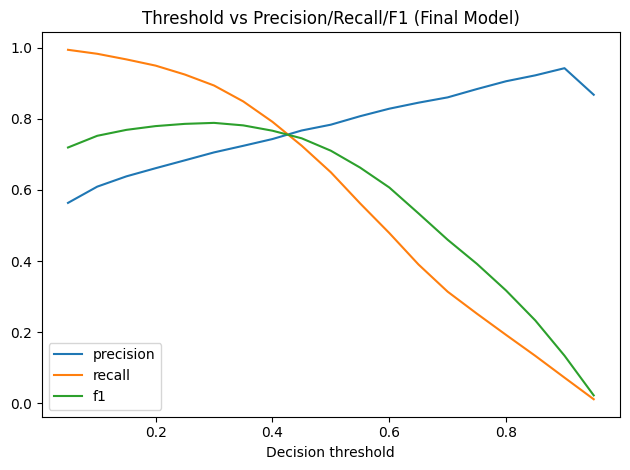

Saved → /Users/Shared/Documents/music-popularity-predictor/reports/fig_threshold_sweep.png


In [25]:
# Get probabilities from your final model
proba = final_model.predict_proba(X_test)[:, 1]
res_final = {"proba": proba}   # so later code finds res_final["proba"]

thresholds = np.linspace(0.05, 0.95, 19)
vals = []
for t in thresholds:
    yp = (proba >= t).astype(int)
    vals.append([
        t,
        precision_score(y_test, yp, zero_division=0),
        recall_score(y_test, yp, zero_division=0),
        f1_score(y_test, yp, zero_division=0)
    ])
thr_df = pd.DataFrame(vals, columns=["threshold","precision","recall","f1"])
display(thr_df)

fig, ax = plt.subplots()
ax.plot(thr_df["threshold"], thr_df["precision"], label="precision")
ax.plot(thr_df["threshold"], thr_df["recall"], label="recall")
ax.plot(thr_df["threshold"], thr_df["f1"], label="f1")
ax.set_xlabel("Decision threshold")
ax.set_title("Threshold vs Precision/Recall/F1 (Final Model)")
ax.legend()
plt.tight_layout()
fig.savefig(REPORTS / "fig_threshold_sweep.png", dpi=200)
plt.show()
print("Saved →", REPORTS / "fig_threshold_sweep.png")

In [30]:
import joblib
from pathlib import Path

MODELS = Path("../models")   # since you confirmed with os.listdir("../models")

models = [
    ("LogReg_Pipeline", joblib.load(MODELS / "logistic_pipeline.pkl")),
    ("LogReg+Decade", joblib.load(MODELS / "logistic_with_decade.pkl")),
    ("RF_Default", joblib.load(MODELS / "random_forest.pkl")),
    ("RF_Tuned", joblib.load(MODELS / "rf_tuned.pkl")),
    ("RF_Tuned+Decade", joblib.load(MODELS / "rf_tuned_with_decade.pkl")),
    ("XGBoost", joblib.load(MODELS / "xgboost.pkl")),
    ("XGBoost+Decade", joblib.load(MODELS / "xgboost_with_decade.pkl")),
]

In [29]:
import os
print(os.listdir("../models"))


['xgboost.pkl', 'feature_columns_with_decade.pkl', 'rf_tuned_feature_importances.csv', 'xgboost_with_decade.pkl', 'feature_columns.pkl', 'logistic_with_decade.pkl', 'rf_tuned_with_decade_feature_importances.csv', 'random_forest_with_decade.pkl', 'logistic_pipeline.pkl', 'rf_tuned.pkl', 'rf_tuned_with_decade.pkl', 'random_forest.pkl']


DATA: /Users/Shared/Documents/music-popularity-predictor/notebooks/../data/processed
MODELS: /Users/Shared/Documents/music-popularity-predictor/notebooks/../models
REPORTS: /Users/Shared/Documents/music-popularity-predictor/notebooks/../reports


/opt/anaconda3/envs/musicpop/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



=== Test-set performance (threshold = 0.50) ===


Model  Accuracy  Precision    Recall        F1   ROC-AUC  \
2       RF_Default  0.842374   0.778327  0.957431  0.858639  0.945886   
3         RF_Tuned  0.824860   0.771057  0.924106  0.840673  0.910199   
5          XGBoost  0.800414   0.756757  0.885429  0.816052  0.874558   
4  RF_Tuned+Decade  0.772683   0.763517  0.790075  0.776569  0.855310   
6   XGBoost+Decade  0.758575   0.749413  0.776940  0.762928  0.840924   
0  LogReg_Pipeline  0.736804   0.712138  0.794940  0.751264  0.809948   
1    LogReg+Decade  0.513865   0.507034  0.999514  0.672779  0.593520   

     PR-AUC  
2  0.941780  
3  0.893998  
5  0.842015  
4  0.832692  
6  0.813687  
0  0.770677  
1  0.551597

Saved → /Users/Shared/Documents/music-popularity-predictor/notebooks/../reports/table_model_comparison.csv


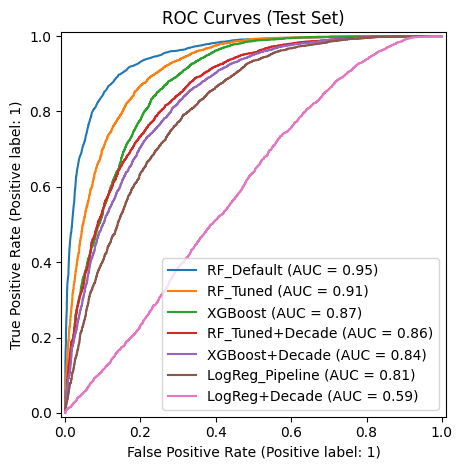

Saved → /Users/Shared/Documents/music-popularity-predictor/notebooks/../reports/fig_roc_curves.png


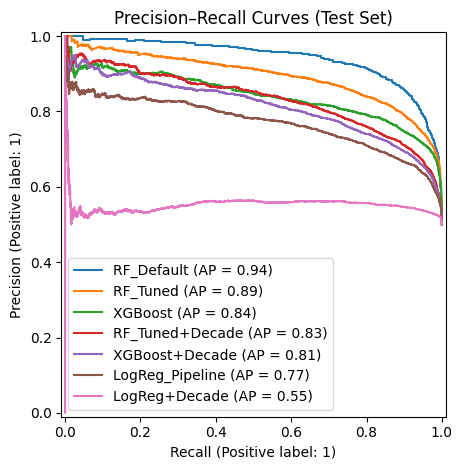

Saved → /Users/Shared/Documents/music-popularity-predictor/notebooks/../reports/fig_pr_curves.png


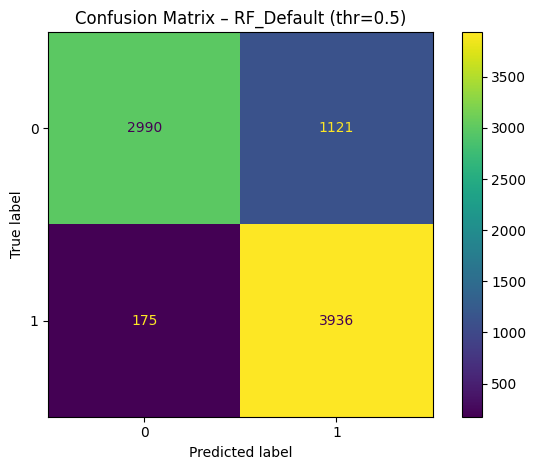

Saved → /Users/Shared/Documents/music-popularity-predictor/notebooks/../reports/fig_confusion_best.png


In [ ]:
# ==== Evaluate saved models & plot ROC/PR (from notebooks/ dir) ====
from pathlib import Path
import joblib, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)

# ---- Paths (relative to notebooks/) ----
ROOT = Path.cwd().resolve()
DATA = ROOT / "../data" / "processed"
MODELS = ROOT / "../models"
REPORTS = ROOT / "../reports"
REPORTS.mkdir(parents=True, exist_ok=True)

print("DATA:", DATA)
print("MODELS:", MODELS)
print("REPORTS:", REPORTS)

# ---- Load processed data (prefer with decade) ----
clean_path = DATA / "cleaned_music_data_with_decade.csv"
if not clean_path.exists():
    clean_path = DATA / "cleaned_music_data.csv"
df = pd.read_csv(clean_path)
df.columns = df.columns.str.strip()

if "popularity" not in df.columns:
    raise ValueError("Could not find 'popularity' column in processed data.")
y = df["popularity"].astype(int).values
X_full = df.drop(columns=["popularity"], errors="ignore")

# ---- Helper: align features to a schema (fill missing with 0, correct order) ----
def align_to_schema(X_df: pd.DataFrame, schema_path: Path) -> pd.DataFrame:
    feature_cols = joblib.load(schema_path)
    Xc = X_df.copy()
    for c in feature_cols:
        if c not in Xc.columns:
            Xc[c] = 0
    return Xc[feature_cols]

# ---- Train/test split once (same rows for all models) ----
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.20, random_state=42, stratify=y
)

# ---- Build the model list and map each to its schema ----
def pick_schema_for_model(model_filename: str) -> Path:
    """If model name contains 'with_decade', use the with_decade schema; else base schema."""
    if "with_decade" in model_filename:
        return MODELS / "feature_columns_with_decade.pkl"
    return MODELS / "feature_columns.pkl"

# Only include models that actually exist on disk
model_files = [
    ("LogReg_Pipeline",         "logistic_pipeline.pkl"),
    ("LogReg+Decade",           "logistic_with_decade.pkl"),
    ("RF_Default",              "random_forest.pkl"),
    ("RF_Tuned",                "rf_tuned.pkl"),
    ("RF_Tuned+Decade",         "rf_tuned_with_decade.pkl"),
    ("XGBoost",                 "xgboost.pkl"),
    ("XGBoost+Decade",          "xgboost_with_decade.pkl"),
]
models = []
for name, fname in model_files:
    fpath = MODELS / fname
    if fpath.exists():
        models.append((name, joblib.load(fpath), fpath.name))
    else:
        print(f"[skip] {fname} not found")

if not models:
    raise FileNotFoundError("No saved models found. Check ../models/")

# ---- Scoring helper ----
def score_model(model, X_eval, y_eval, threshold=0.50):
    # probabilities if available
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_eval)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_eval)
        proba = 1 / (1 + np.exp(-scores))
    else:
        # last resort
        preds = model.predict(X_eval)
        proba = preds.astype(float)

    y_pred = (proba >= threshold).astype(int)
    metrics = {
        "Accuracy":  accuracy_score(y_eval, y_pred),
        "Precision": precision_score(y_eval, y_pred, zero_division=0),
        "Recall":    recall_score(y_eval, y_pred, zero_division=0),
        "F1":        f1_score(y_eval, y_pred, zero_division=0),
        "ROC-AUC":   np.nan,
        "PR-AUC":    np.nan,
        "proba":     proba,
        "y_pred":    y_pred
    }
    # AUCs if possible
    try:
        metrics["ROC-AUC"] = roc_auc_score(y_eval, proba)
    except Exception:
        pass
    try:
        metrics["PR-AUC"] = average_precision_score(y_eval, proba)
    except Exception:
        pass
    return metrics

# ---- Evaluate all models ----
THRESHOLD = 0.50
rows = []
per_model = {}

for name, model_obj, fname in models:
    # Handle case: some .pkl are dicts
    if isinstance(model_obj, dict):
        if "model" in model_obj:
            model = model_obj["model"]
        else:
            print(f"[warn] {name} appears to be a dict without 'model' key → skipping")
            continue
    else:
        model = model_obj

    schema_path = pick_schema_for_model(fname)
    if not schema_path.exists():
        print(f"[warn] Missing schema for {name} → {schema_path.name}. Skipping.")
        continue

    # align X_test to the model’s schema
    Xt = align_to_schema(X_test, schema_path)
    res = score_model(model, Xt, y_test, threshold=THRESHOLD)
    per_model[name] = res
    rows.append([
        name, res["Accuracy"], res["Precision"], res["Recall"],
        res["F1"], res["ROC-AUC"], res["PR-AUC"]
    ])

# ---- Metrics table ----
table = pd.DataFrame(rows, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC", "PR-AUC"]).sort_values("F1", ascending=False)
print("\n=== Test-set performance (threshold = 0.50) ===")
display(table)
table_path = REPORTS / "table_model_comparison.csv"
table.to_csv(table_path, index=False)
print("Saved →", table_path)

# ---- ROC curves ----
fig_roc, ax_roc = plt.subplots()
for name in table["Model"]:
    proba = per_model[name]["proba"]
    RocCurveDisplay.from_predictions(y_test, proba, ax=ax_roc, name=name)
ax_roc.set_title("ROC Curves (Test Set)")
plt.tight_layout()
roc_path = REPORTS / "fig_roc_curves.png"
fig_roc.savefig(roc_path, dpi=200)
plt.show()
print("Saved →", roc_path)

# ---- Precision–Recall curves ----
fig_pr, ax_pr = plt.subplots()
for name in table["Model"]:
    proba = per_model[name]["proba"]
    PrecisionRecallDisplay.from_predictions(y_test, proba, ax=ax_pr, name=name)
ax_pr.set_title("Precision–Recall Curves (Test Set)")
plt.tight_layout()
pr_path = REPORTS / "fig_pr_curves.png"
fig_pr.savefig(pr_path, dpi=200)
plt.show()
print("Saved →", pr_path)

# ---- Confusion matrix for the best model (by F1) ----
best_name = table.iloc[0]["Model"]
from sklearn.metrics import ConfusionMatrixDisplay
cm_fig, cm_ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, per_model[best_name]["y_pred"], ax=cm_ax)
cm_ax.set_title(f"Confusion Matrix – {best_name} (thr={THRESHOLD})")
plt.tight_layout()
cm_path = REPORTS / "fig_confusion_best.png"
cm_fig.savefig(cm_path, dpi=200)
plt.show()
print("Saved →", cm_path)
